# Import Libraries

In [136]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
from collections import Counter
from category_encoders import TargetEncoder, BinaryEncoder
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler,
    EditedNearestNeighbours, 
    RepeatedEditedNearestNeighbours, 
    AllKNN, 
    CondensedNearestNeighbour, 
    ClusterCentroids, 
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.linear_model import (
    LogisticRegression,
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge
)
from sklearn.feature_selection import (
    SelectKBest, 
    SelectFpr, 
    SelectFdr, 
    SelectFwe, 
    SelectPercentile, 
    GenericUnivariateSelect, 
    VarianceThreshold, 
    RFE, 
    RFECV, 
    SequentialFeatureSelector, 
    SelectFromModel, 
    f_regression, 
    chi2, 
    f_classif, 
    mutual_info_classif, 
    mutual_info_regression
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import (
    KNeighborsClassifier,
    NearestNeighbors
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    balanced_accuracy_score
)
from tpot import TPOTClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.decomposition import (
    PCA, 
    FactorAnalysis, 
    TruncatedSVD, 
    FastICA, 
    KernelPCA
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense  # type: ignore
from tensorflow.keras.models import Model  # type: ignore
from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
logging.basicConfig(level=logging.INFO)

# Call_def

In [137]:
from ML_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    
    check_outliers_IQR,
    check_outliers_zscore,
    plot_outliers_boxplot,
    box_plot_all_columns,
    plot_outliers_scatterplot_IQR,
    plot_outliers_scatterplot_zscore,
    handle_outliers_IQR,
    handle_outliers_zscore,
    
    calculate_skewness,
    handle_skewness,
    
    get_columns_with_2_unique_values,
    analyze_null_columns,
    
    check_balance_classification,
    over_under_sampling_classification,
    
    rate_by_group,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    
    calculate_correlation,
    Heatmap_Correlation,
    
    create_custom_scatter_plot,
    plot_histograms,
    
    feature_selection,
    
    encode_column,
    
    get_x_y,
    get_x_y_TVT,
    get_x_y_TVT_shape,
    validate_test_data_categorical_columns,
    
    scale_data,
    
    dimensionality_reduction,
    
    get_cross_validator,
    grid_search_classifier,
    random_search_classifier,
    get_classifier,
    plot_feature_importance,
    Check_Overfitting_Classification,
    plot_confusion_matrix,
    evaluate_model_Classification,
    plots_evaluate_models,
)

# call_visualization_def

In [138]:
from ML_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Read_Data

In [139]:
df = read_data(r'customer_churn_dataset-testing-master.csv')
true_original_df = copy.deepcopy(df)
print(df.shape)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from customer_churn_dataset-testing-master.csv
(64374, 12)


CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0

In [140]:
target_column = 'Churn'

In [141]:
# Make the target is last column
df = target_last_col(df, target_column)

# Get Information of Data

In [142]:
df_columns = df.columns.to_list()
print(df_columns)

['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']


In [143]:
columns_info(df)

names  dtypes  \
0          CustomerID   int64   
1                 Age   int64   
2              Gender  object   
3              Tenure   int64   
4     Usage Frequency   int64   
5       Support Calls   int64   
6       Payment Delay   int64   
7   Subscription Type  object   
8     Contract Length  object   
9         Total Spend   int64   
10   Last Interaction   int64   
11              Churn   int64   

                                               unique  n_unique  \
0   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...     64374   
1   [22, 41, 47, 35, 53, 30, 54, 36, 65, 46, 56, 3...        48   
2                                      [Female, Male]         2   
3   [25, 28, 27, 9, 58, 41, 37, 36, 20, 8, 42, 13,...        60   
4   [14, 28, 10, 12, 24, 15, 11, 5, 4, 27, 23, 7, ...        30   
5                  [4, 7, 2, 5, 9, 10, 0, 6, 1, 3, 8]        11   
6   [27, 13, 29, 17, 2, 10, 28, 18, 8, 23, 21, 14,...        31   
7                          [Basic, Standard, Premium]         3   
8                        [Monthly, Annual, Quarterly]         3   
9   [598, 584, 757, 232, 533, 500, 574, 323, 687, ...       901   
10  [9, 20, 21, 18, 29, 14, 16, 8, 10, 3, 1, 24, 3...        30   
11                                             [1, 0]         2   

    number_of_rows  number_of_null  
0            64374               0  
1            64374               0  
2            64374               0  
3            64374               0  
4            64374               0  
5            64374               0  
6            64374               0  
7            64374               0  
8            64374               0  
9            64374               0  
10           64374               0  
11           64374               0

# drop not useful columns

#### list of columns

In [144]:
not_useful_columns_name = ['CustomerID']
not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [145]:
# not_useful_columns(df=df, column_name='')

# change the dtype of the column from object to numeric

#### list of columns

In [146]:
# convert_to_numeric_columns_name = ['']
# convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [147]:
# convert_to_numeric(df=df, column_name='Total Charges')

# take copy for Visualization

In [148]:
original_df = copy.deepcopy(df)
original_df.head(3)

Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0   22  Female      25               14              4             27   
1   41  Female      28               28              7             13   
2   47    Male      27               10              2             29   

  Subscription Type Contract Length  Total Spend  Last Interaction  Churn  
0             Basic         Monthly          598                 9      1  
1          Standard         Monthly          584                20      0  
2           Premium          Annual          757                21      0

# Describe numerical column and his information

In [149]:
numerical_column = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_column)

['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']


In [150]:
df.describe()

Age        Tenure  Usage Frequency  Support Calls  \
count  64374.000000  64374.000000     64374.000000   64374.000000   
mean      41.970982     31.994827        15.080234       5.400690   
std       13.924911     17.098234         8.816470       3.114005   
min       18.000000      1.000000         1.000000       0.000000   
25%       30.000000     18.000000         7.000000       3.000000   
50%       42.000000     33.000000        15.000000       6.000000   
75%       54.000000     47.000000        23.000000       8.000000   
max       65.000000     60.000000        30.000000      10.000000   

       Payment Delay   Total Spend  Last Interaction         Churn  
count   64374.000000  64374.000000      64374.000000  64374.000000  
mean       17.133952    541.023379         15.498850      0.473685  
std         8.852211    260.874809          8.638436      0.499311  
min         0.000000    100.000000          1.000000      0.000000  
25%        10.000000    313.000000          8.000000      0.000000  
50%        19.000000    534.000000         15.000000      0.000000  
75%        25.000000    768.000000         23.000000      1.000000  
max        30.000000   1000.000000         30.000000      1.000000

# Describe object column and his information

In [151]:
object_column =df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(object_column)

['Gender', 'Subscription Type', 'Contract Length']


In [152]:
df.describe(include=['object'])

Gender Subscription Type Contract Length
count    64374             64374           64374
unique       2                 3               3
top     Female          Standard         Monthly
freq     34353             21502           22130

# Data Encoding columns with 2 unique values

In [153]:
get_columns_with_2_unique_values(df)

The list: ['Gender'] unique values: ('Female', 'Male')


In [154]:
columns = ['Gender']
df = encode_column(df, columns = columns, method='binary', binary_1='Male', binary_0='Female')

In [155]:
# # if the target column not binary
# columns = [target_column]
# true_original_df = encode_column(true_original_df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

In [156]:
df.head()

Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0   22       1      25               14              4             27   
1   41       1      28               28              7             13   
2   47       0      27               10              2             29   
3   35       0       9               12              5             17   
4   53       1      58               24              9              2   

  Subscription Type Contract Length  Total Spend  Last Interaction  Churn  
0             Basic         Monthly          598                 9      1  
1          Standard         Monthly          584                20      0  
2           Premium          Annual          757                21      0  
3           Premium       Quarterly          232                18      0  
4          Standard          Annual          533                18      0

# check columns have nulls

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                64374 non-null  int64 
 1   Gender             64374 non-null  int64 
 2   Tenure             64374 non-null  int64 
 3   Usage Frequency    64374 non-null  int64 
 4   Support Calls      64374 non-null  int64 
 5   Payment Delay      64374 non-null  int64 
 6   Subscription Type  64374 non-null  object
 7   Contract Length    64374 non-null  object
 8   Total Spend        64374 non-null  int64 
 9   Last Interaction   64374 non-null  int64 
 10  Churn              64374 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 5.4+ MB


In [158]:
null_columns = analyze_null_columns(df)
null_columns

The columns dtype is object: []
The columns dtype is numerical: []


Empty DataFrame
Columns: [Column, Null Count, Type]
Index: []

In [159]:
# df.isnull().sum()

## Identify columns with missing values

In [160]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# Removing Rows with Missing Values

#### list of columns

In [161]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [162]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [163]:
# remove_missing_rows(df=df)

## check columns with missing values

In [164]:
# # Identify columns with missing values
# missing_columns = df.columns[df.isnull().any()].tolist()
# print("Columns with missing values: \n" , missing_columns)

# Filling Missing Values

### Filling Missing Values for all DataFrame

In [165]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [166]:
# fill_missing_columns = ['Total Charges', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [167]:
# df = fill_missing_values_column(df, columns='', model='KNNImputer', n_neighbors=3)

### check columns with missing values

In [168]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers and skew with box plot

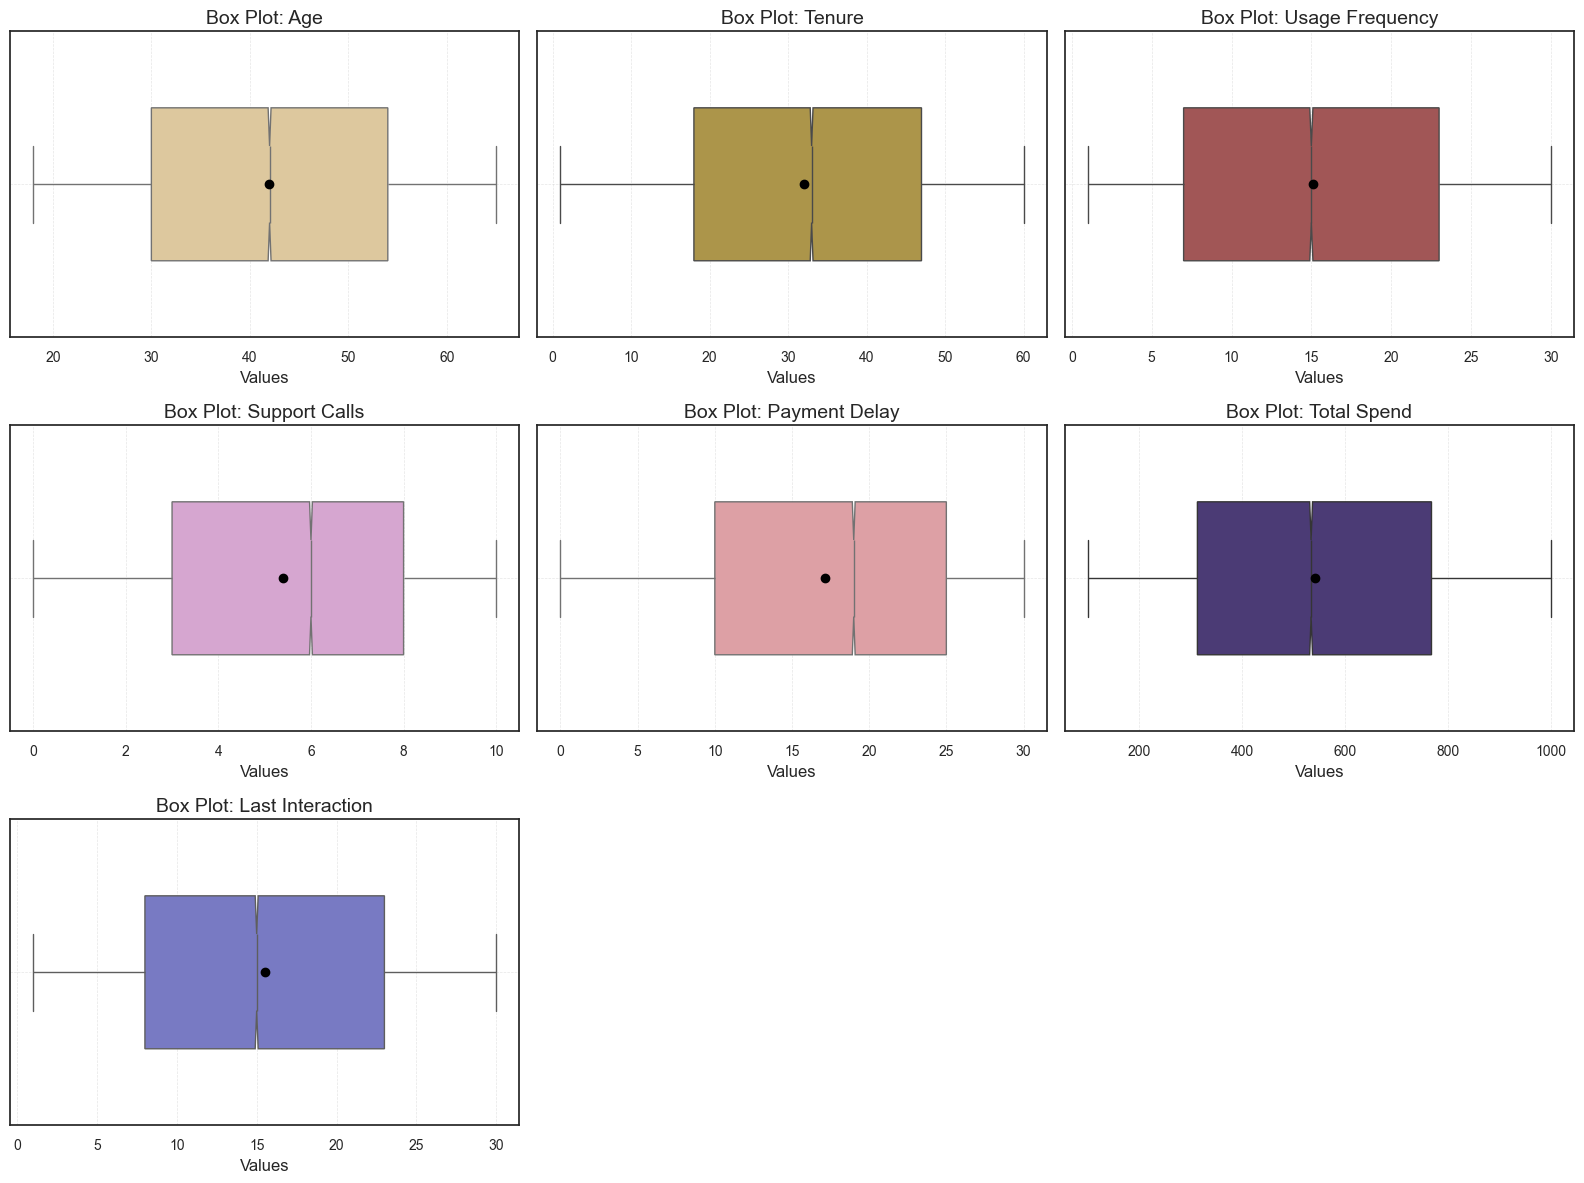

In [169]:
box_plot_all_columns(df, subplot_row = 3, figsize=(16, 12))

## check outliers IQR

### Numbers

In [170]:
outliers_df, outlier_counts = check_outliers_IQR(df)

Number of outliers in each column (IQR method):
Age: 0
Tenure: 0
Usage Frequency: 0
Support Calls: 0
Payment Delay: 0
Total Spend: 0
Last Interaction: 0

Columns with outliers: []


### Scatter Plot

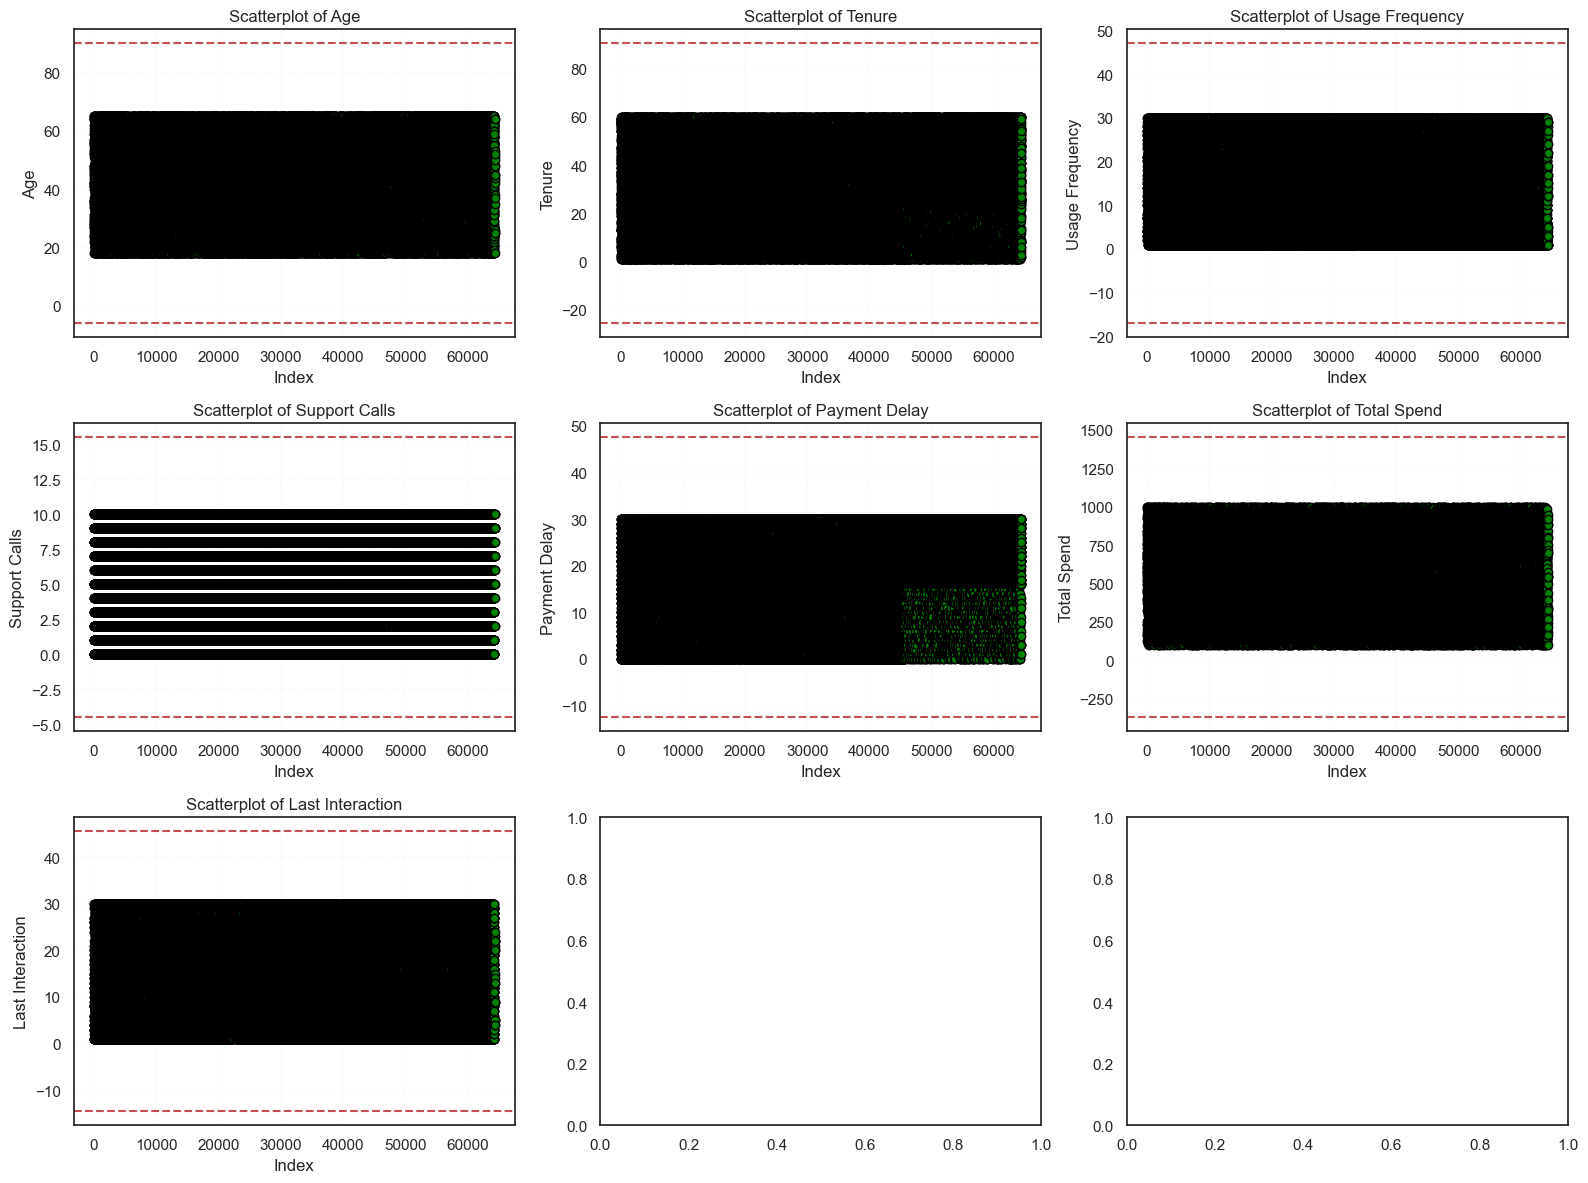

In [171]:
plot_outliers_scatterplot_IQR(original_df, outlier_counts)

## Handle Outliers IQR

In [172]:
outliers_column = []

# df = handle_outliers_IQR(df, outliers_column, method='cap')

# df = handle_outliers_IQR(df, outliers_column, method='remove')
# df = handle_outliers_IQR(df, outliers_column, method='impute', imputation_method='mean')
# df = handle_outliers_IQR(df, outliers_column, method='transform', transformation_method='boxcox')

In [173]:
outliers_df, outlier_counts = check_outliers_IQR(df)

Number of outliers in each column (IQR method):
Age: 0
Tenure: 0
Usage Frequency: 0
Support Calls: 0
Payment Delay: 0
Total Spend: 0
Last Interaction: 0

Columns with outliers: []


## check outliers Z-Score

### Numbers

In [174]:
numeric_df, z_scores, outlier_counts_zscore = check_outliers_zscore(df)

Number of outliers in each column (Z-score method):
Age: 0
Tenure: 0
Usage Frequency: 0
Support Calls: 0
Payment Delay: 0
Total Spend: 0
Last Interaction: 0

Columns with outliers: []


### Scatter Plot

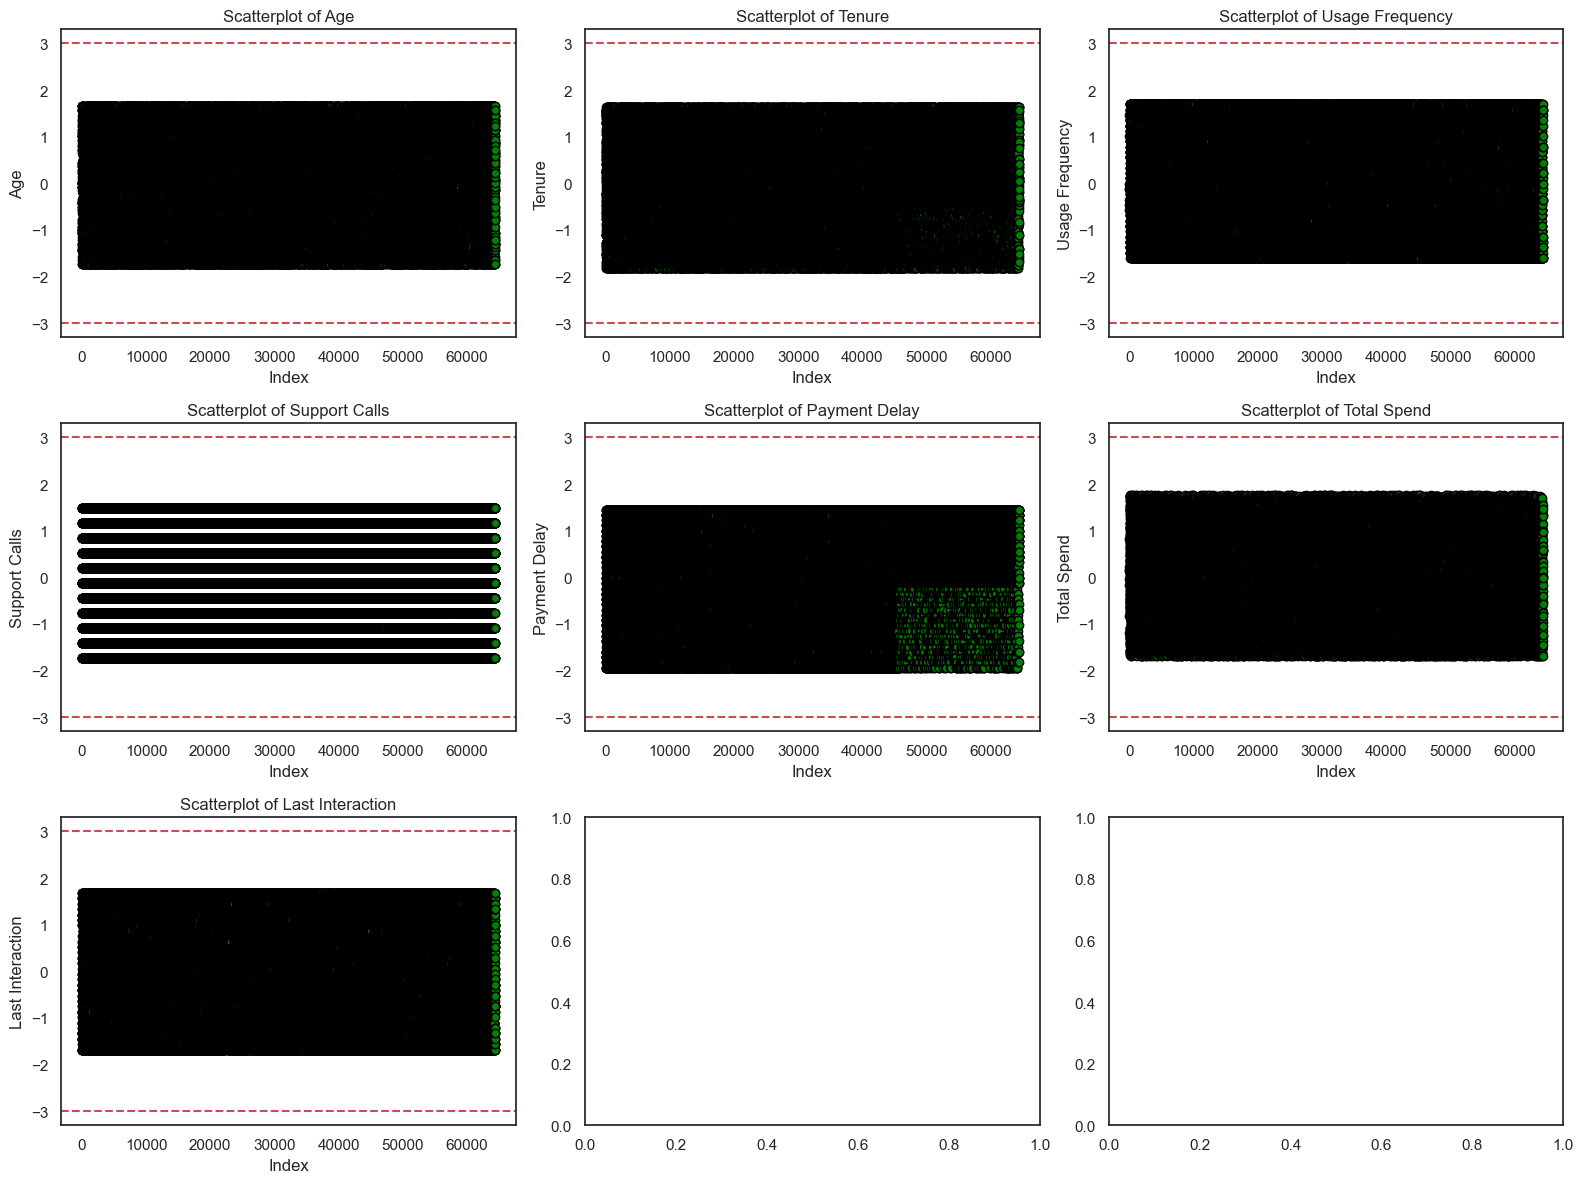

In [175]:
plot_outliers_scatterplot_zscore(z_scores, outlier_counts_zscore)

## Handle Outliers Z-Score

In [176]:
outliers_column = []

# df = handle_outliers_zscore(df, outliers_column, method='cap')

# df = handle_outliers_zscore(df, outliers_column, method='remove')
# df = handle_outliers_zscore(df, outliers_column, method='impute', imputation_method='mean')
# df = handle_outliers_zscore(df, outliers_column, method='transform', transformation_method='boxcox')

In [177]:
numeric_df, z_scores, outlier_counts_zscore = check_outliers_zscore(df)

Number of outliers in each column (Z-score method):
Age: 0
Tenure: 0
Usage Frequency: 0
Support Calls: 0
Payment Delay: 0
Total Spend: 0
Last Interaction: 0

Columns with outliers: []


# skew

In [178]:
columns_right_skewed, columns_left_skewed = calculate_skewness(df)

columns right skewed: []


Tenure is left skewed with skewness -0.12605627128660457
Support Calls is left skewed with skewness -0.19285414431875514
Payment Delay is left skewed with skewness -0.35071402695836457
columns left skewed: ['Tenure', 'Support Calls', 'Payment Delay']


columns right and left skewed: ['Tenure', 'Support Calls', 'Payment Delay']


Age is normal skewed with skewness -0.040893617755290594
Usage Frequency is normal skewed with skewness 0.03754298828827117
Total Spend is normal skewed with skewness 0.04774634961486376
Last Interaction is normal skewed with skewness 0.005111808910520158
normal skewed columns: ['Age', 'Usage Frequency', 'Total Spend', 'Last Interaction']


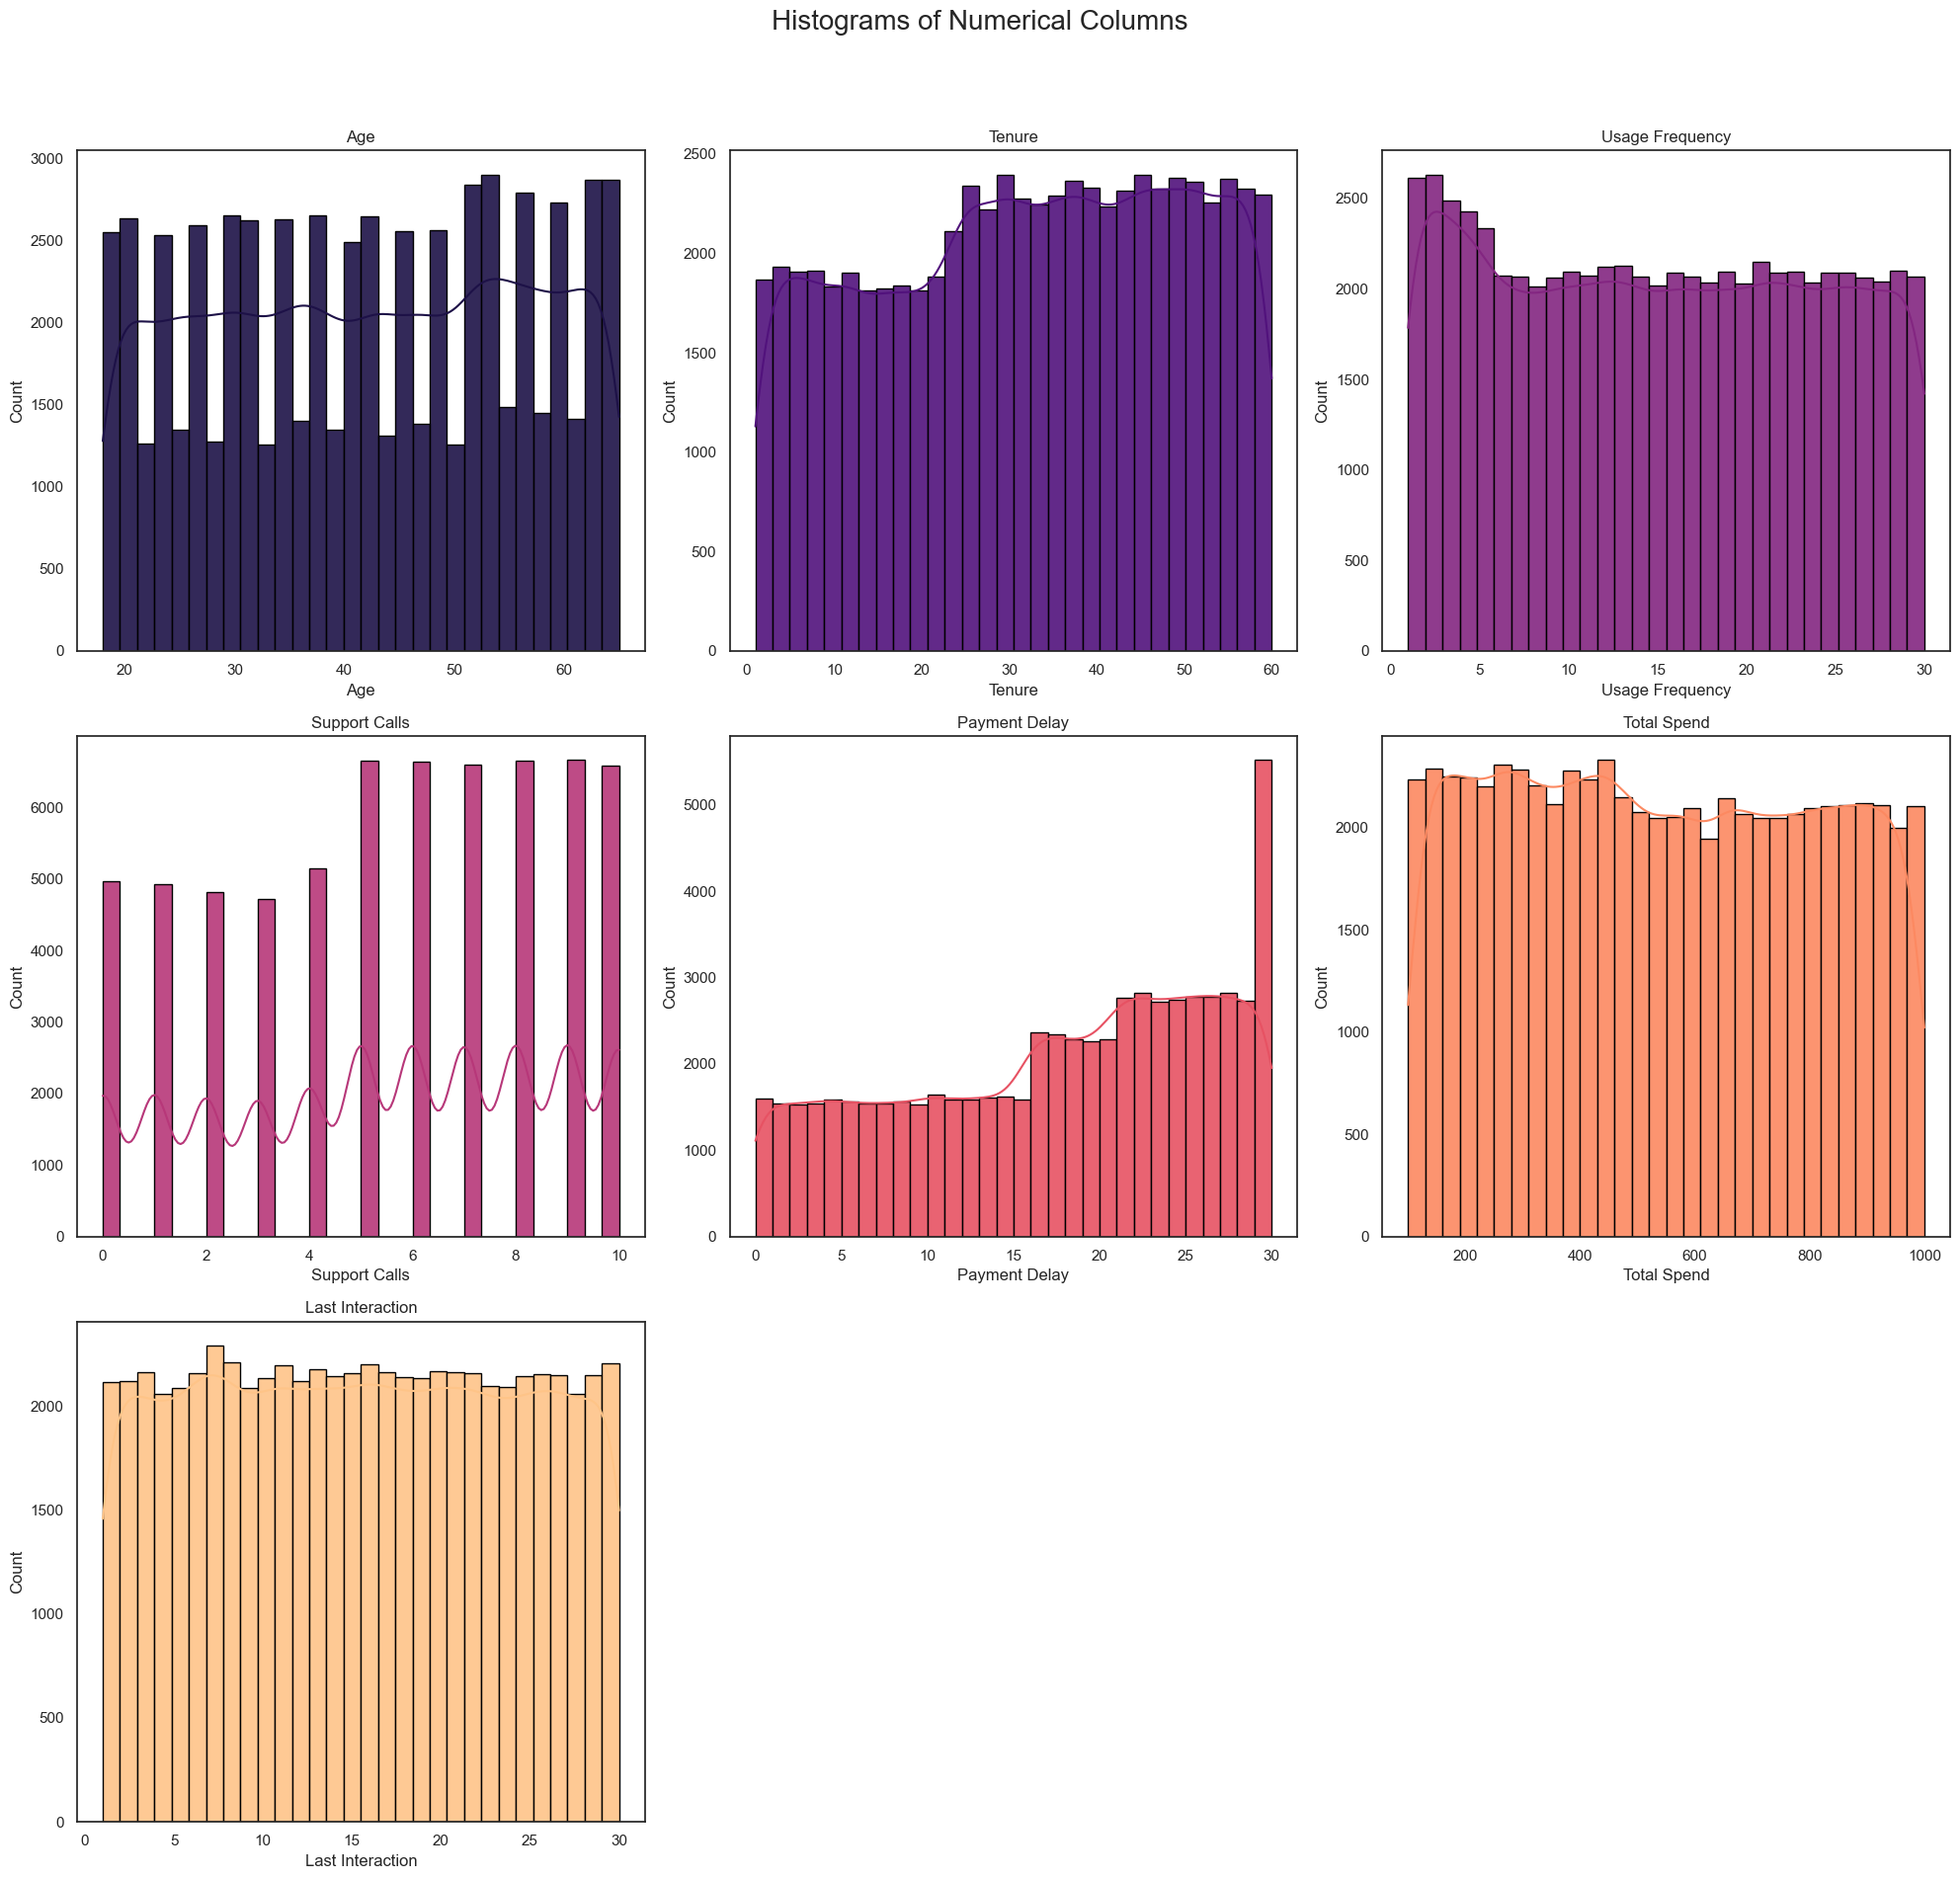

In [179]:
plot_histograms(df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (20, 20))

In [245]:
skewness_columns = ['Payment Delay']
skewness_columns_second = []

# df = handle_skewness(df, skewness_columns, method='yeo_johnson')
# df = handle_skewness(df, skewness_columns_second, method='robust_scale')
# df = handle_skewness(df, skewness_columns, method='yeo_johnson')


In [181]:
columns_right_skewed, columns_left_skewed = calculate_skewness(df)

columns right skewed: []


Tenure is left skewed with skewness -0.12605627128660457
Support Calls is left skewed with skewness -0.19285414431875514
Payment Delay is left skewed with skewness -0.35071402695836423
columns left skewed: ['Tenure', 'Support Calls', 'Payment Delay']


columns right and left skewed: ['Tenure', 'Support Calls', 'Payment Delay']


Age is normal skewed with skewness -0.040893617755290594
Usage Frequency is normal skewed with skewness 0.03754298828827117
Total Spend is normal skewed with skewness 0.04774634961486376
Last Interaction is normal skewed with skewness 0.005111808910520158
normal skewed columns: ['Age', 'Usage Frequency', 'Total Spend', 'Last Interaction']


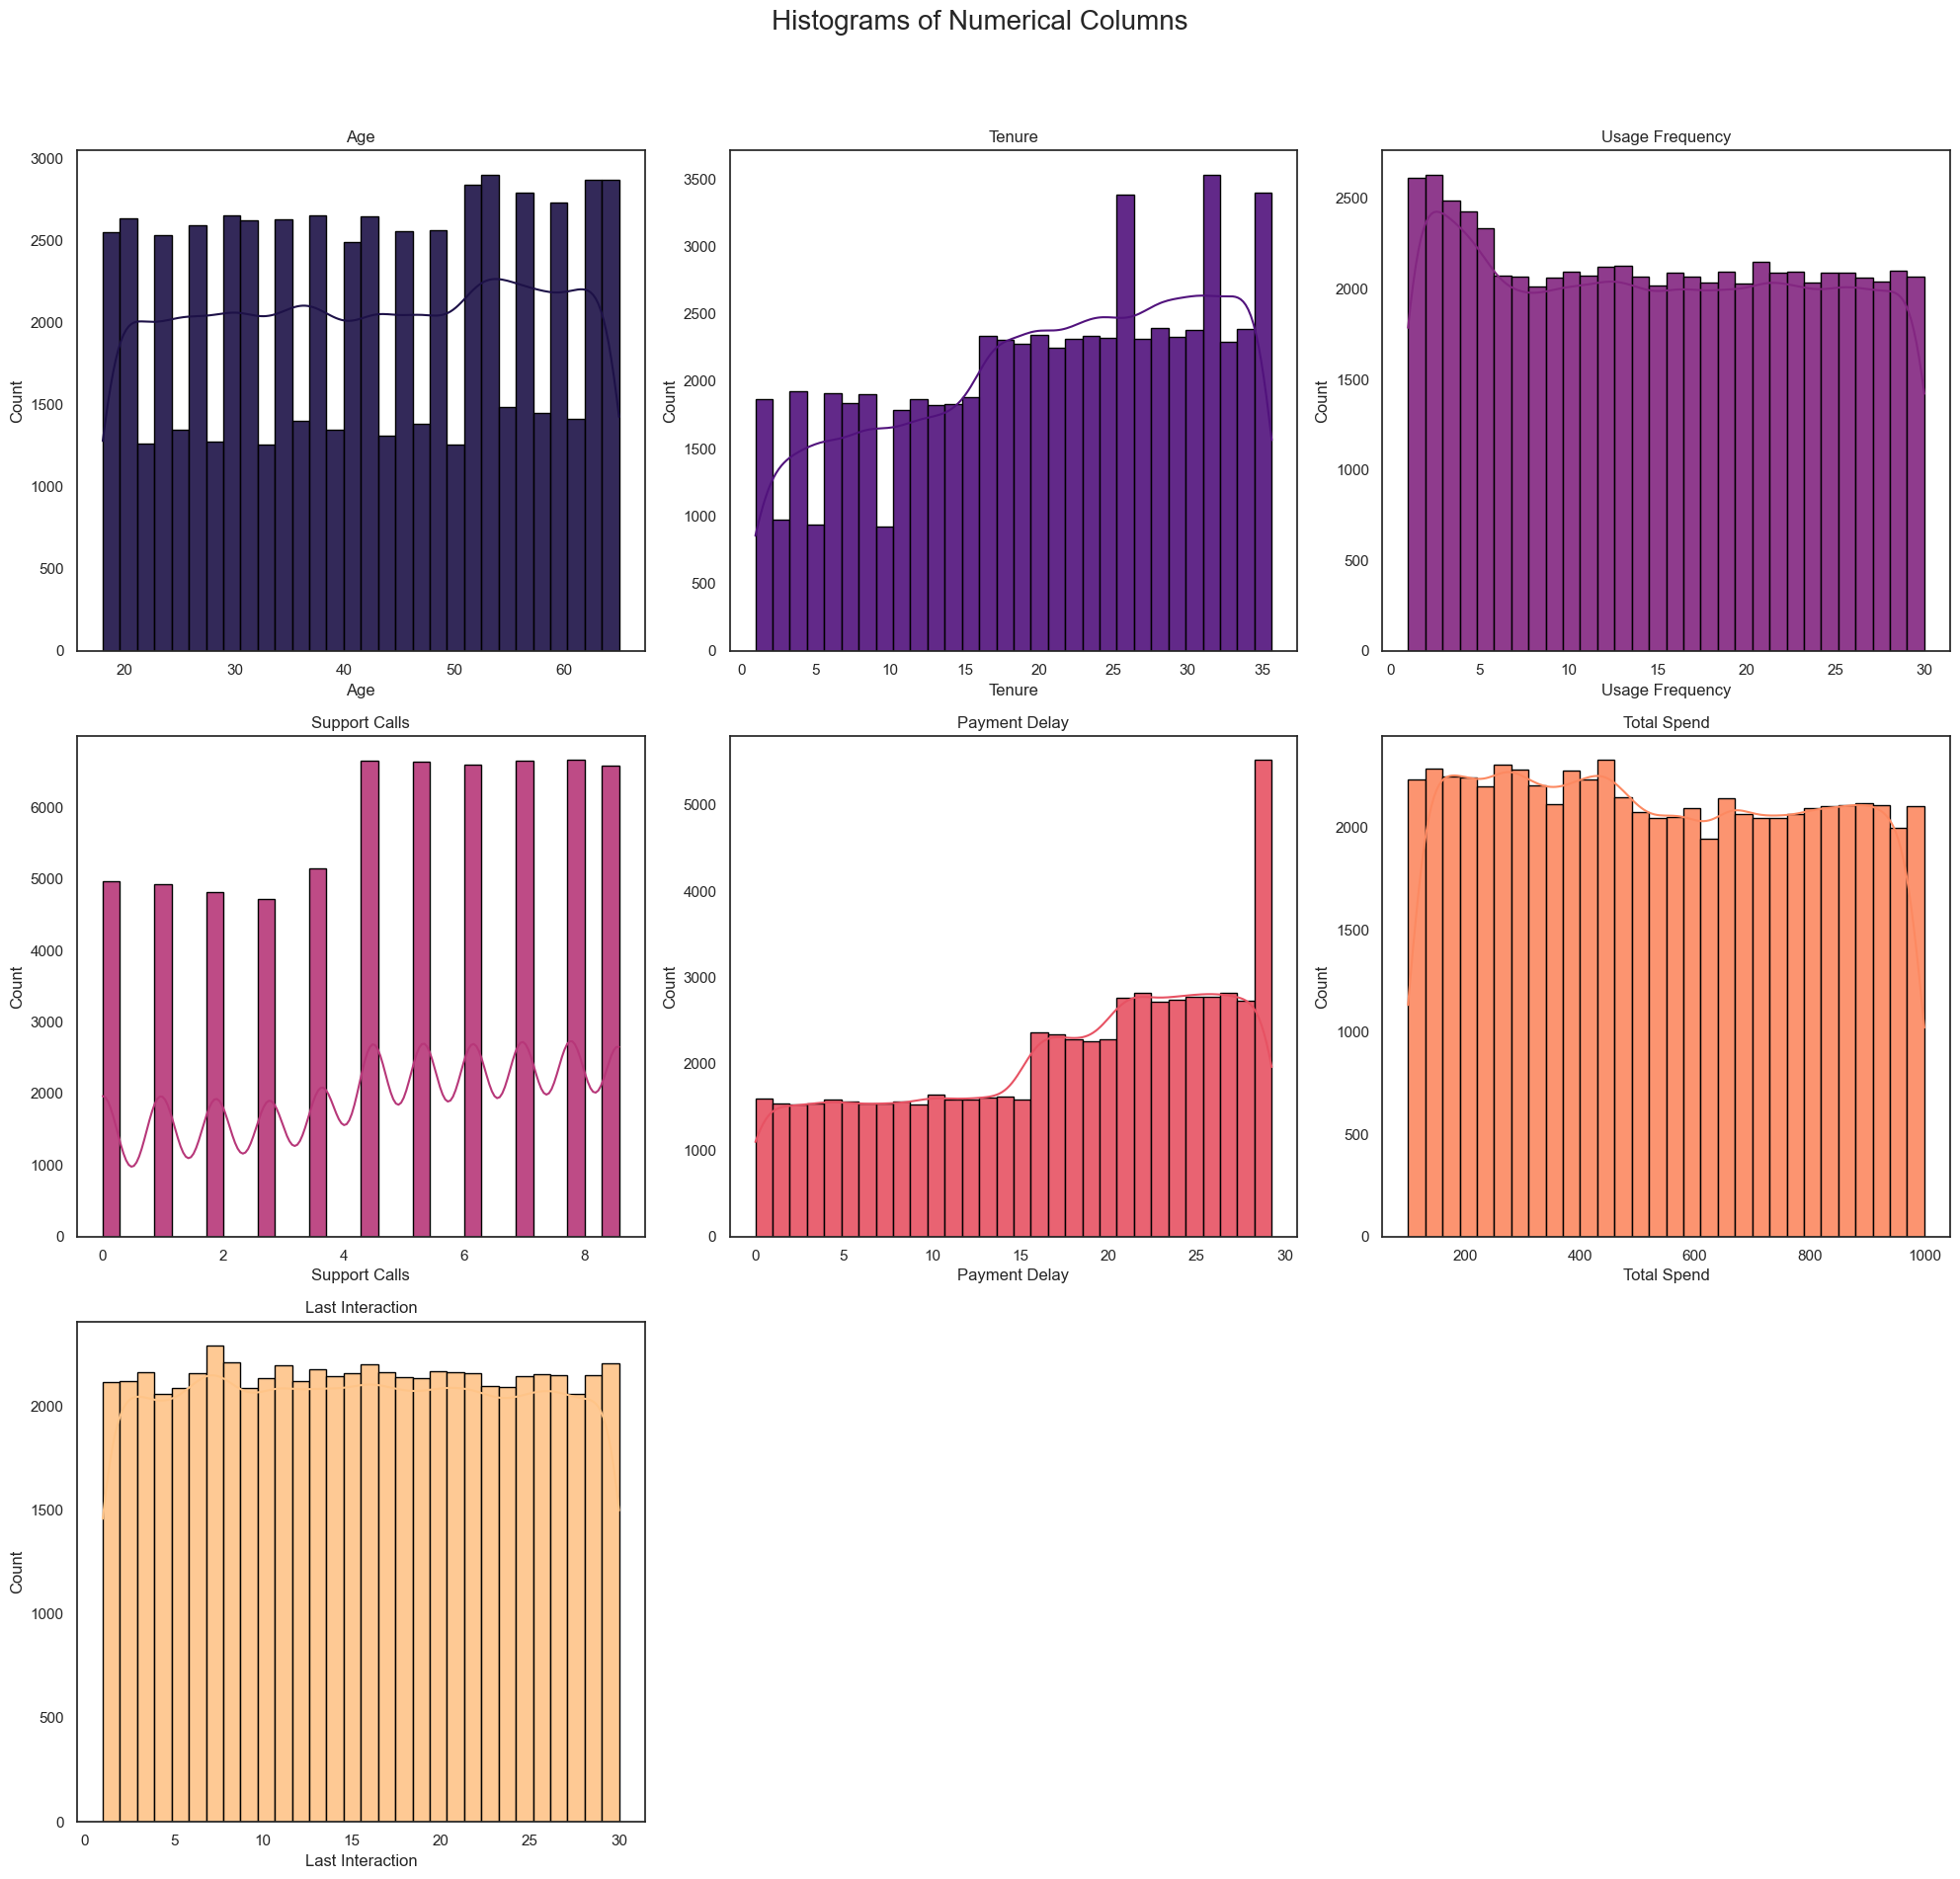

In [85]:
plot_histograms(df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (20, 20))

## check outliers and skew with box plot

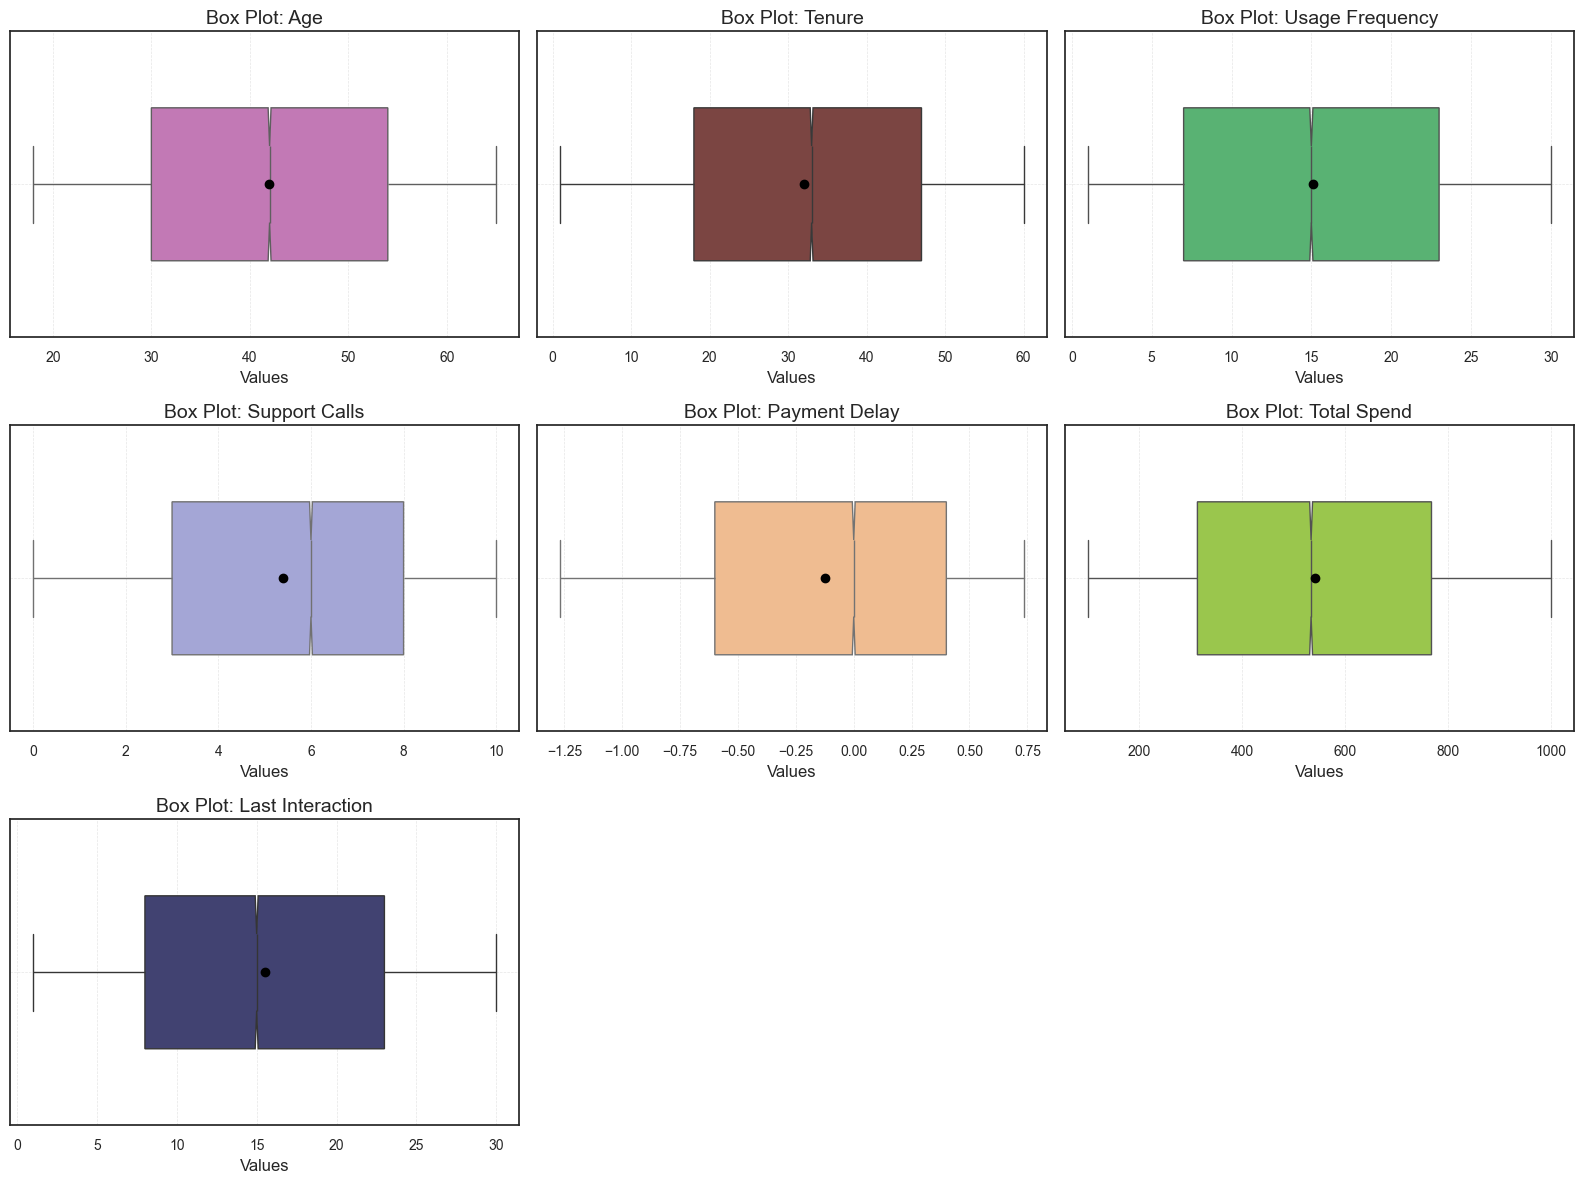

In [183]:
box_plot_all_columns(df, subplot_row = 3, figsize=(16, 12))

# Check the unbalance data

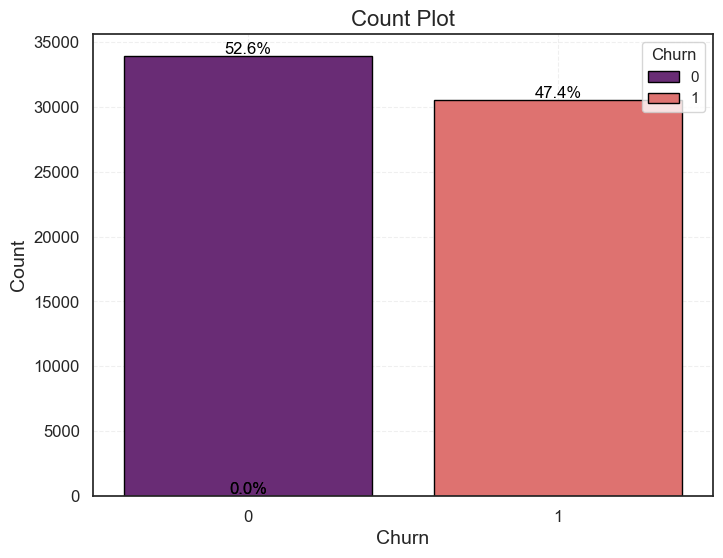

count
name       
0     33881
1     30493

In [32]:
check_balance_classification(df,column_plot='Churn')

# Visualization

## info from the data

In [ ]:
# age_Exited_rates = rate_by_group(true_original_df, 'MaritalStatus', 'Churn', 'CustomerID', positive_class=1, threshold=4)

In [ ]:
# NumOfProducts_Exited_rates = rate_by_group(true_original_df, 'PrizmCode', 'Churn', 'CustomerID', positive_class=1)

In [ ]:
# Geography_Exited_rates = rate_by_group(true_original_df, 'CreditRating', 'Churn', 'CustomerID', positive_class=1)

In [ ]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionOffersAccepted', 'Churn', 'CustomerID', positive_class=1, threshold=5)

In [ ]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionCalls', 'Churn', 'CustomerID', positive_class=1, threshold=5)
# Tenure_Exited_rates

## chart

In [33]:
PaymentMethod_name = df['Contract Length'].value_counts().index.to_list()
PaymentMethod_values = df['Contract Length'].value_counts().values.tolist()
# pie_chart(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Payment Methods")
pie_chart_plotly(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Contract Length")


In [34]:
InternetService_name = df['Subscription Type'].value_counts().index.to_list()
InternetService_values = df['Subscription Type'].value_counts().values.tolist()
# pie_chart(labels=InternetService_name, sizes=InternetService_values, title="Payment Methods")
pie_chart_plotly(labels=InternetService_name, sizes=InternetService_values, title="Subscription Type")

In [35]:
Contract_name = original_df['Gender'].value_counts().index.to_list()
Contract_values = original_df['Gender'].value_counts().values.tolist()
# pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Gender")

## Multiple bar

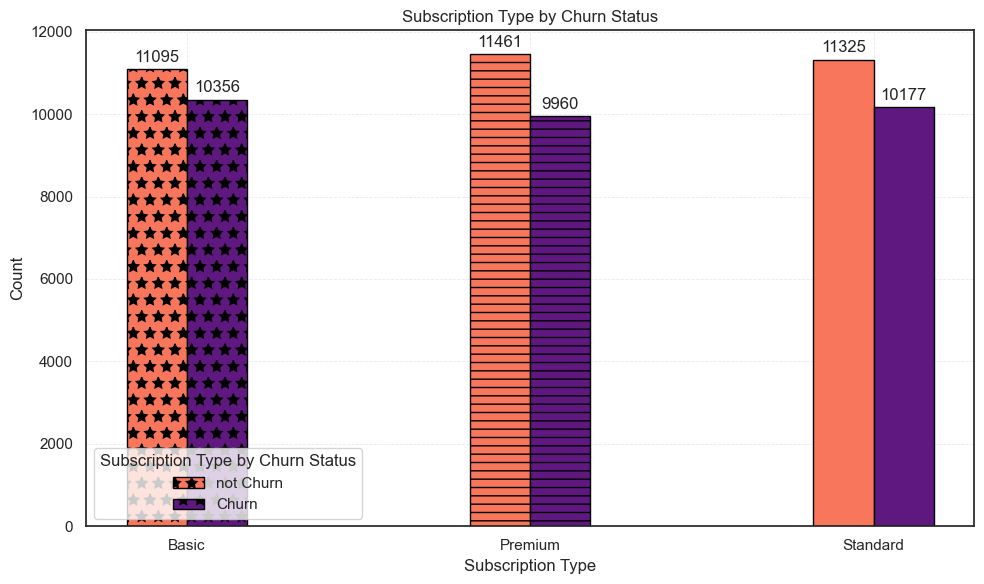

In [36]:
grouped_data = original_df.groupby(['Subscription Type', 'Churn']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Churn', 'Churn']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Subscription Type by Churn Status', xlabel='Subscription Type', ylabel='Count')

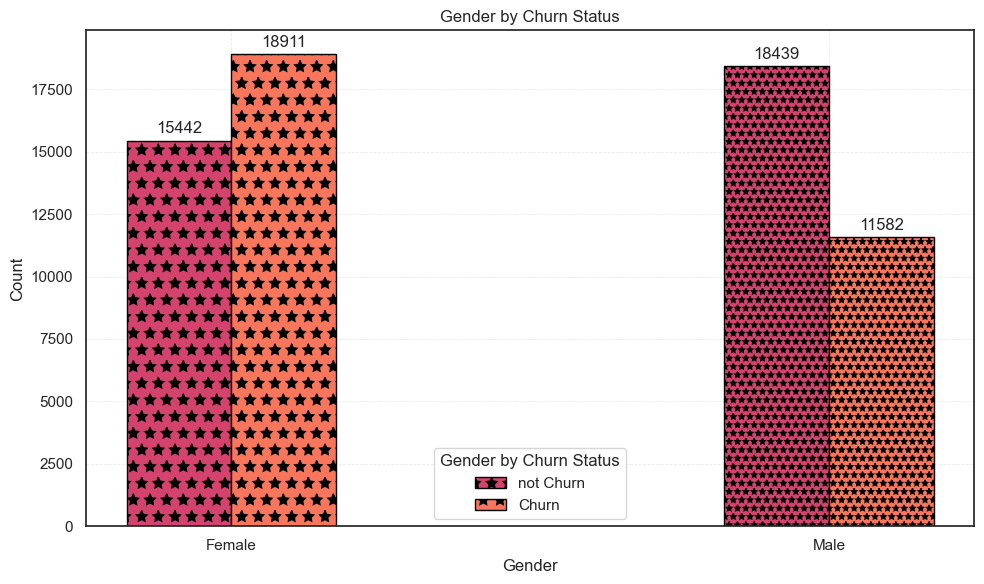

In [37]:
grouped_data = original_df.groupby(['Gender', 'Churn']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Churn', 'Churn']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Gender by Churn Status', xlabel='Gender', ylabel='Count')

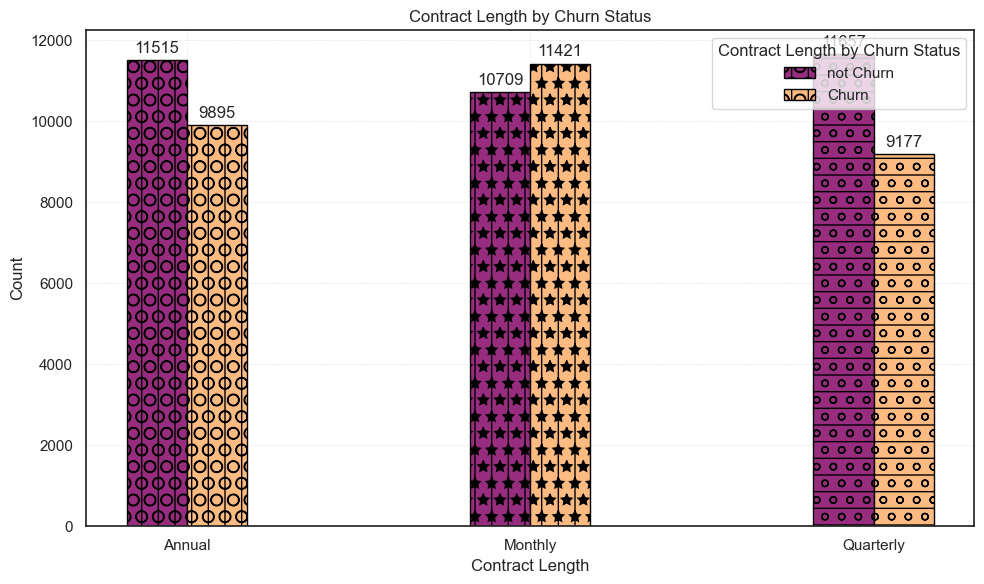

In [38]:
grouped_data = original_df.groupby(['Contract Length', 'Churn']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['not Churn', 'Churn']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Contract Length by Churn Status', xlabel='Contract Length', ylabel='Count')

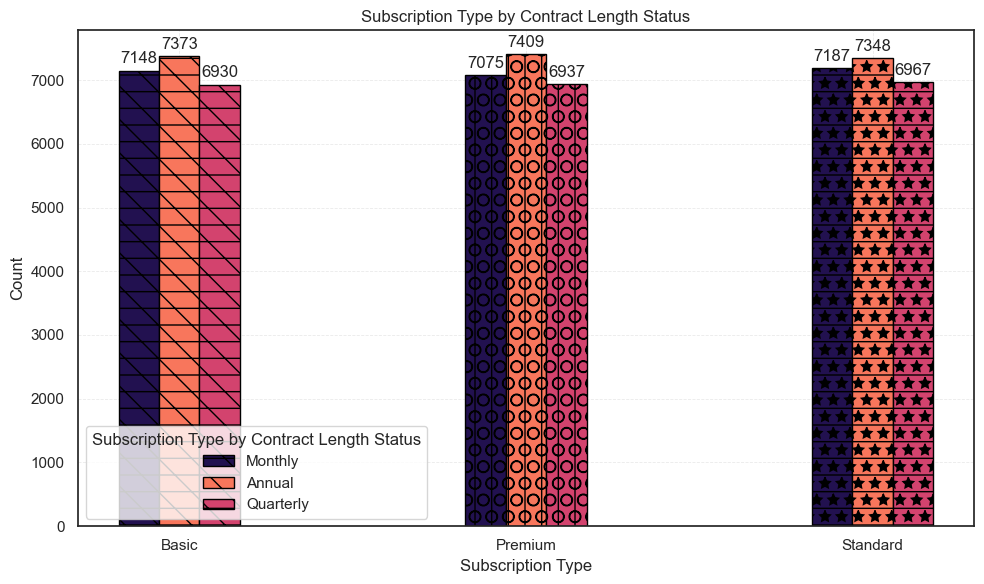

In [39]:
grouped_data = original_df.groupby(['Subscription Type', 'Contract Length']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Monthly', 'Annual', 'Quarterly']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Subscription Type by Contract Length Status', xlabel='Subscription Type', ylabel='Count')

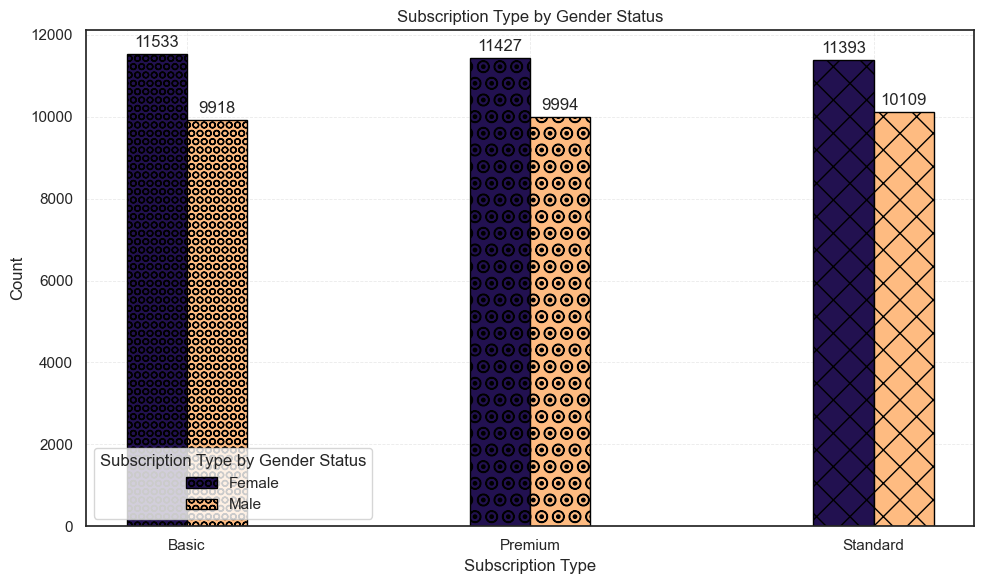

In [40]:
grouped_data = original_df.groupby(['Subscription Type', 'Gender']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Female', 'Male']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Subscription Type by Gender Status', xlabel='Subscription Type', ylabel='Count')

## Bar

In [41]:
column_counts = original_df['Tenure'].value_counts().reset_index()
column_counts.columns = ['tenure', 'value']

bar_plot_plotly(df=column_counts, x='tenure', y='value', hue='value')

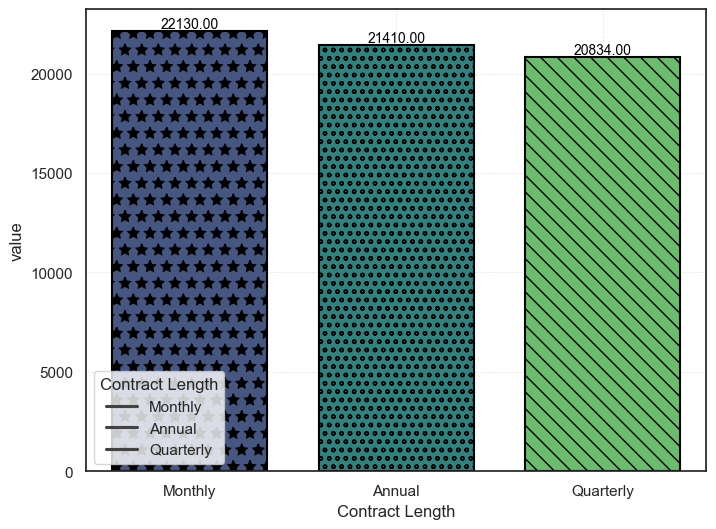

In [42]:
column_counts = original_df['Contract Length'].value_counts().reset_index()
column_counts.columns = ['Contract Length', 'value']

bar_plot_seaborn(df=column_counts, x='Contract Length', y='value',palette='viridis')

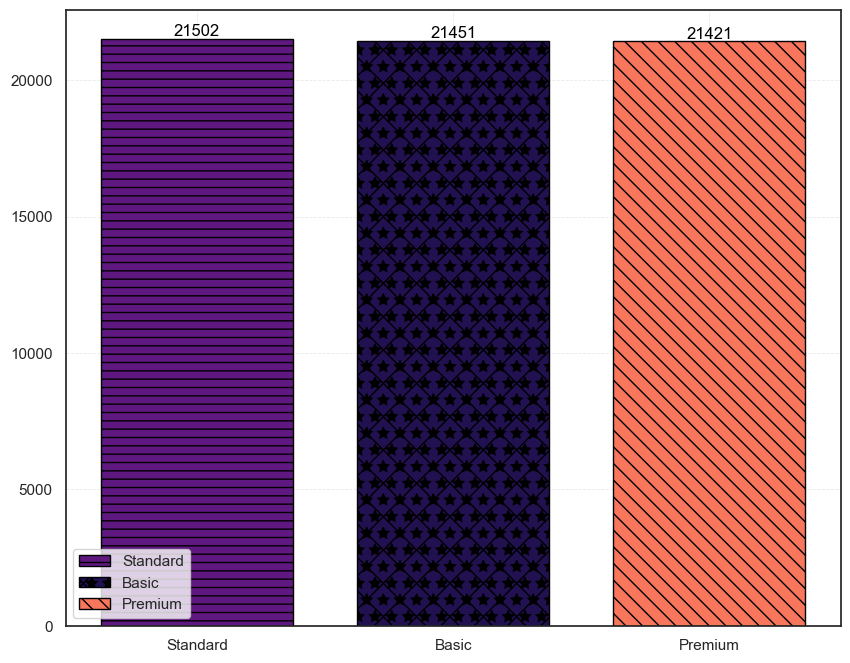

In [43]:
column_counts = original_df['Subscription Type'].value_counts().reset_index()
column_counts.columns = ['Subscription Type', 'value']

bar_plot_matplotlib(column_counts['Subscription Type'], column_counts['value'],x_rotation=0)

## count plot

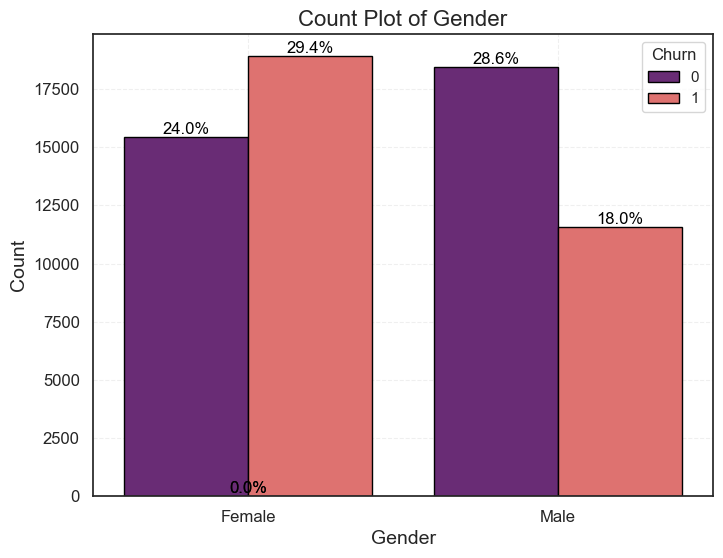

<Axes: title={'center': 'Count Plot of Gender'}, xlabel='Gender', ylabel='Count'>

In [44]:
count_plot(df=original_df , x='Gender' , hue='Churn')

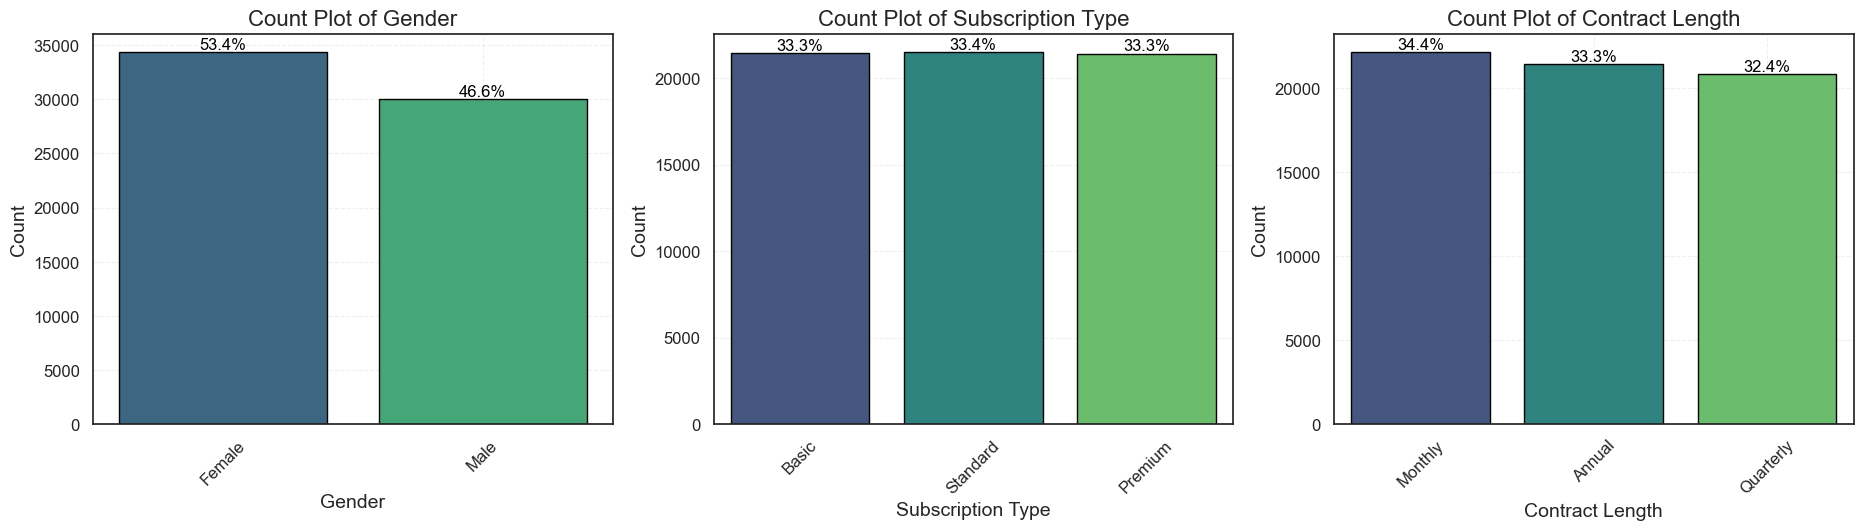

In [45]:
categorical_features=original_df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
count_plot_all_column(categorical_features, original_df, vision='x', num_of_column=4)

## Violin

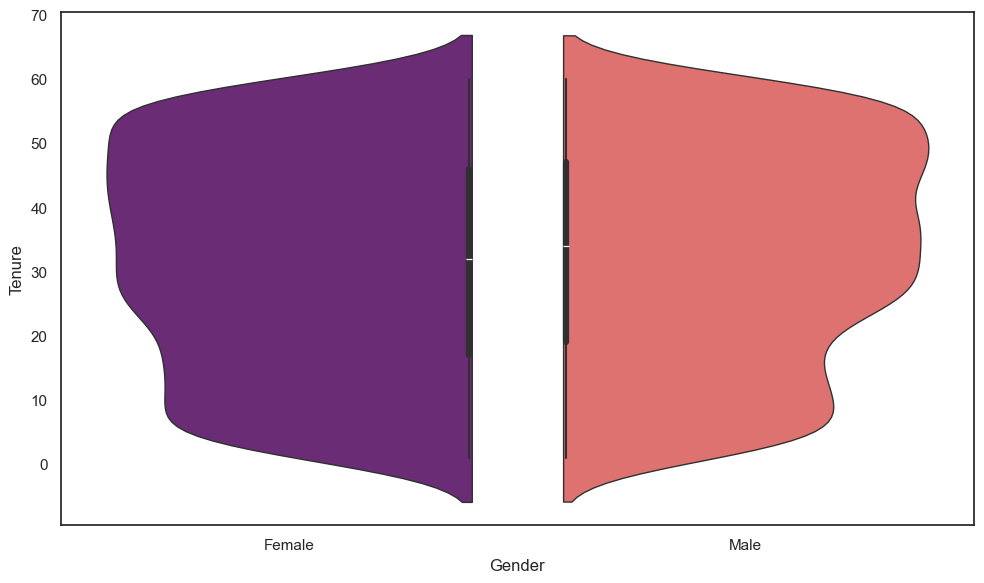

In [46]:
violin_plot(data=original_df, x='Gender', y='Tenure', hue='Gender',split=True) #catagorical column in x and numircal in y

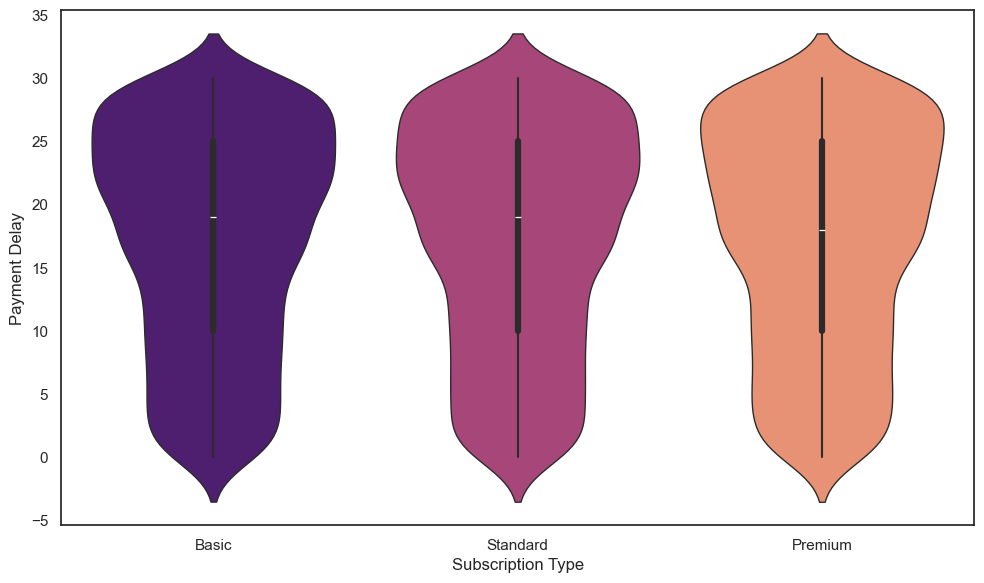

In [47]:
violin_plot(data=original_df, x='Subscription Type', y='Payment Delay', hue='Subscription Type') #catagorical column in x and numircal in y

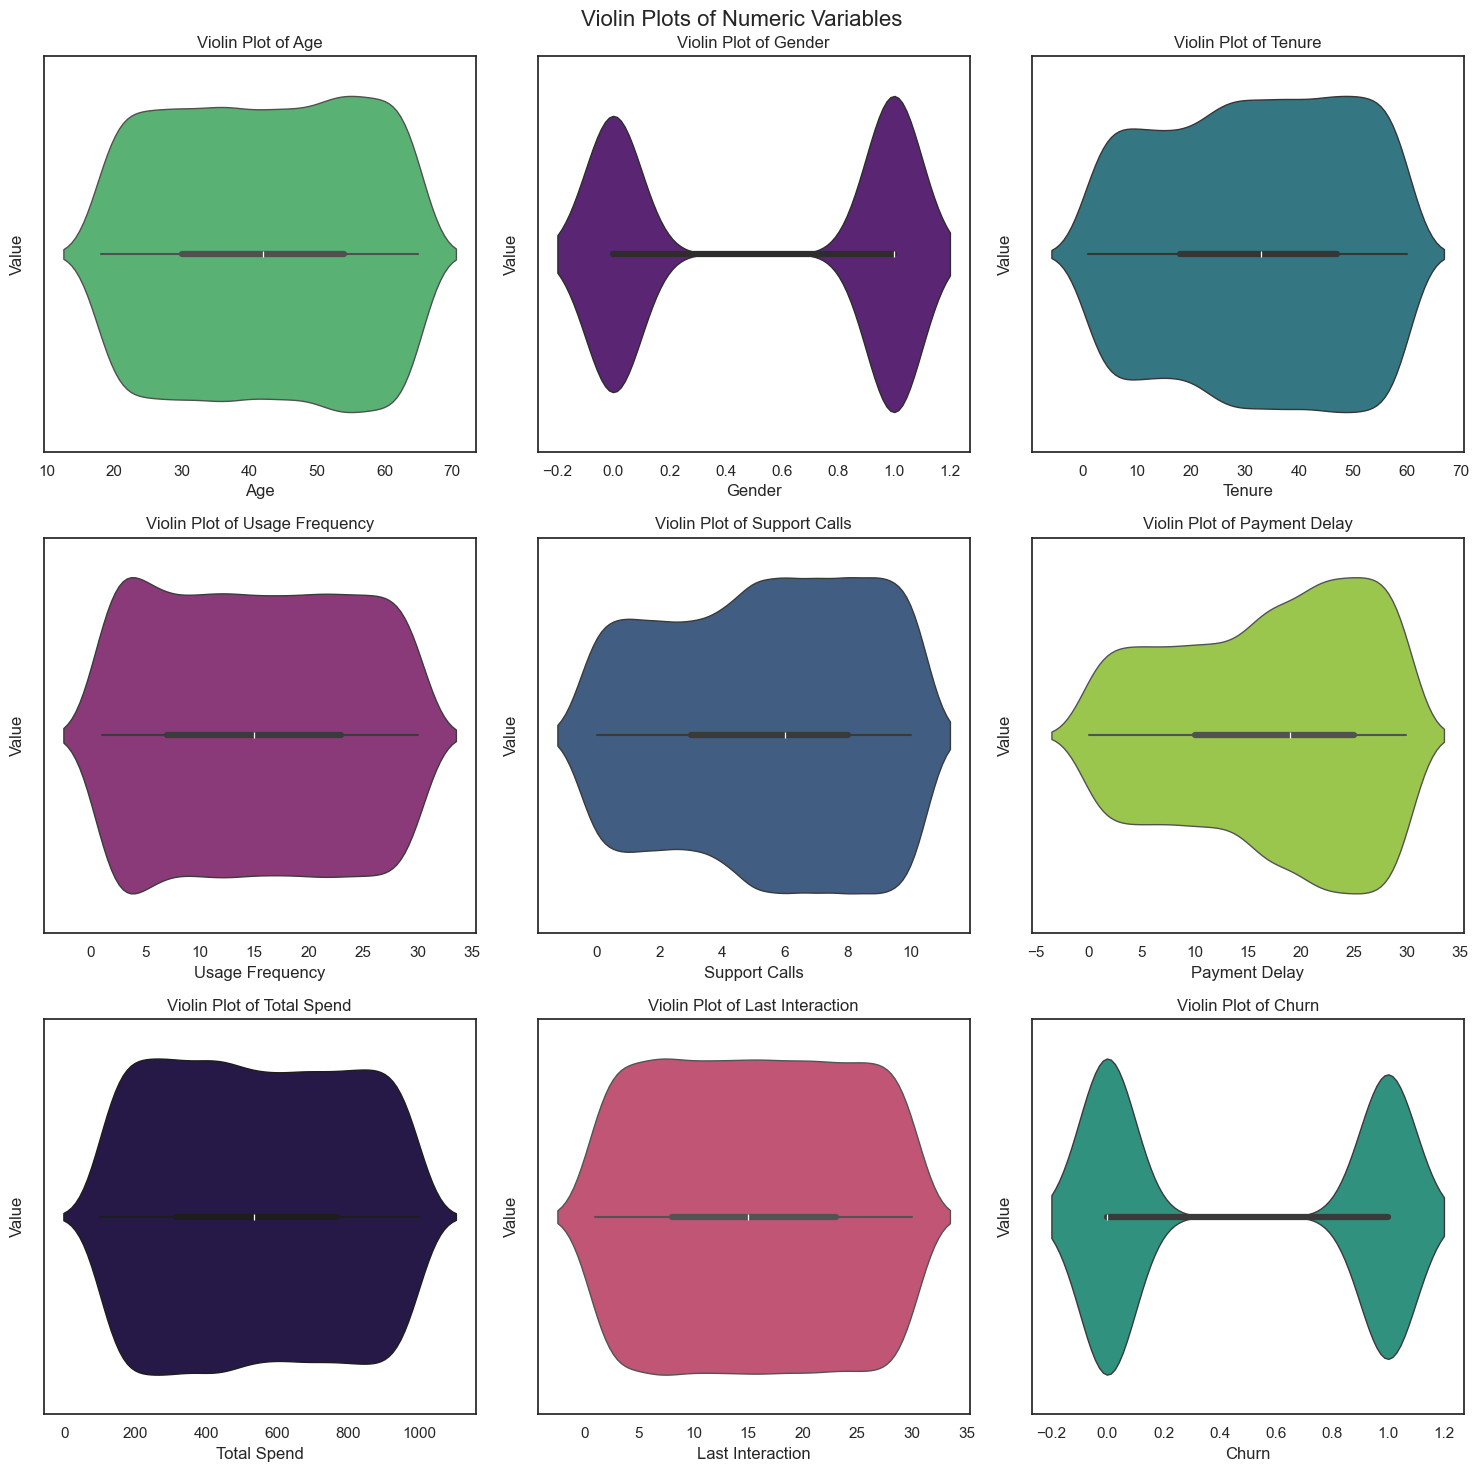

In [48]:
plot_violin_all_column(df)

## Histogram

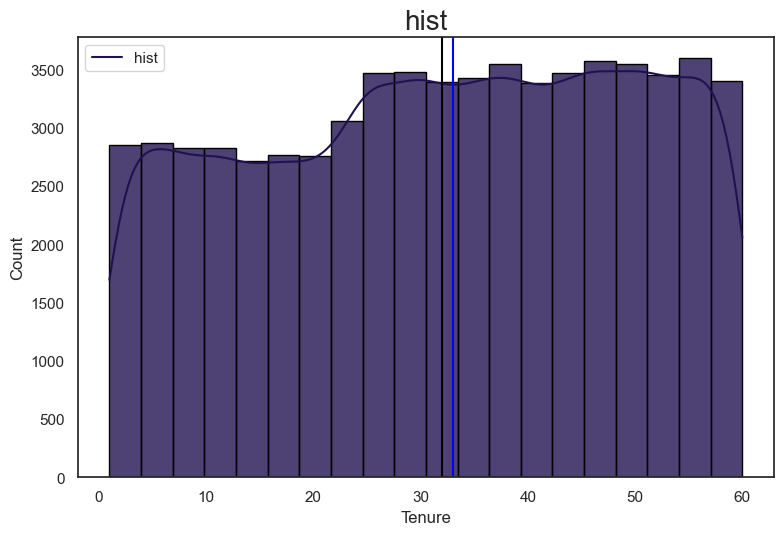

In [49]:
plot_single_histogram_seaborn(original_df,x='Tenure', bins=20, palette='magma', show=False)
plt.axvline(np.mean(original_df["Tenure"]) , color = "black" , label ="The Mean of the tenure")
plt.axvline(np.median(original_df["Tenure"]) , color = "blue" , label ="The Median of the tenure")
plt.show()

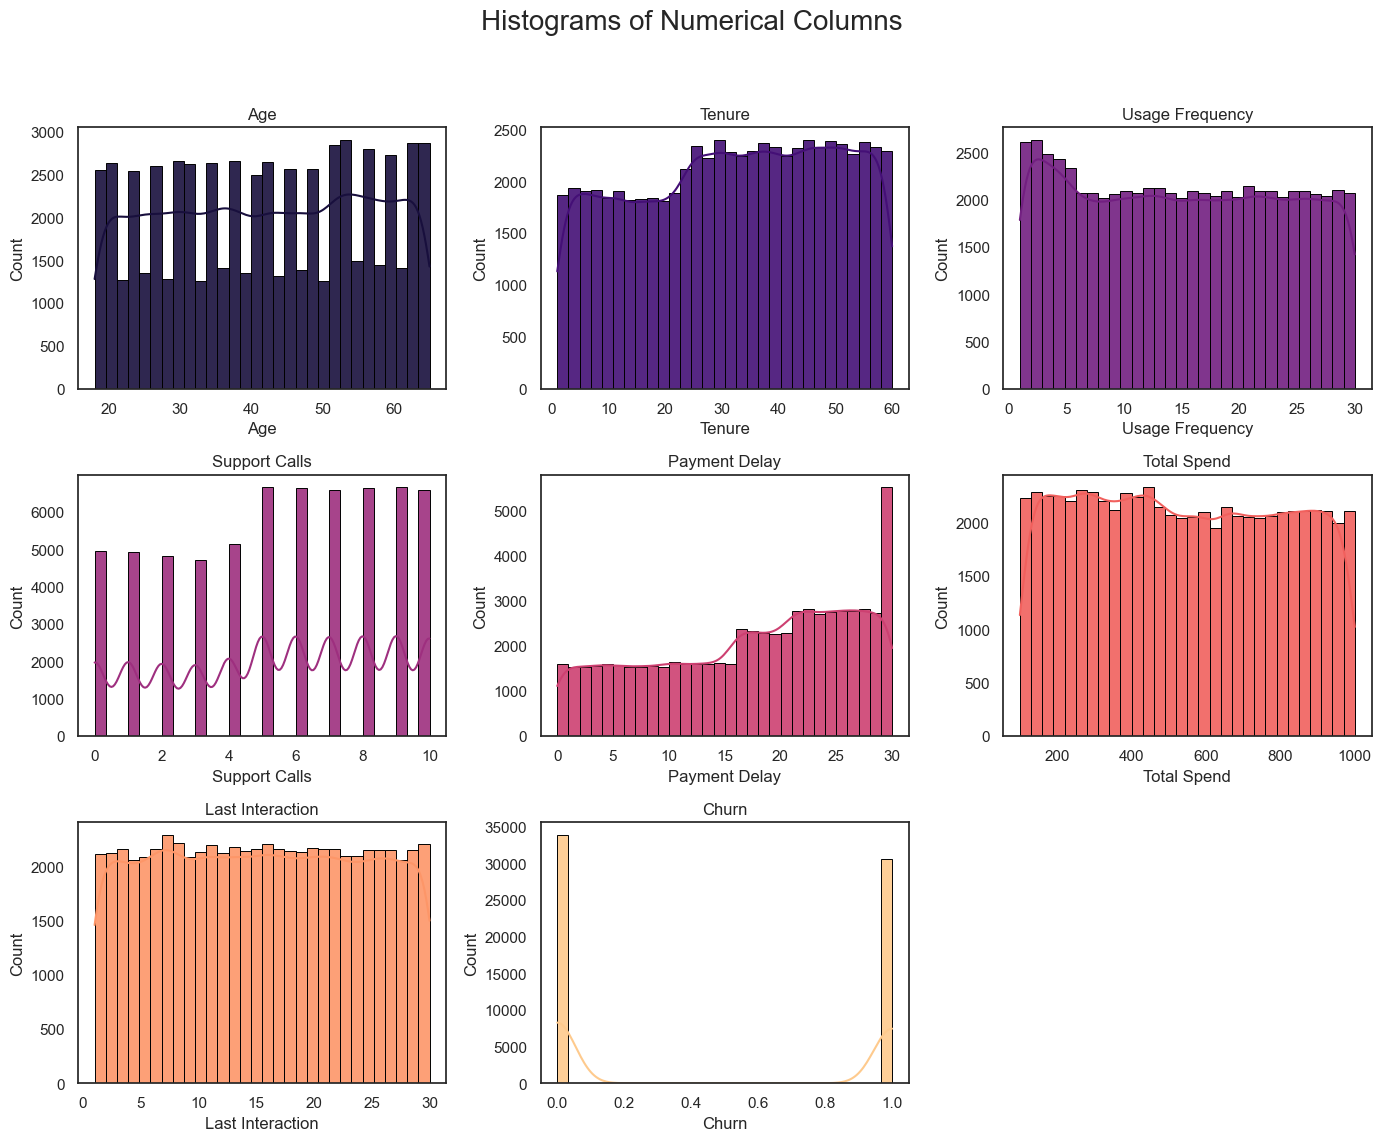

In [50]:
plot_histograms(original_df,column=None, bins=30)

# Correlation Coefficient

## Calculate Correlation

In [184]:
calculate_correlation(df, outcome_column=target_column,num_results=7)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 7 results:
          Variable  Pearson Coefficient        P-Value
5    Payment Delay             0.557386   0.000000e+00
4    Support Calls             0.304631   0.000000e+00
2           Tenure             0.195327   0.000000e+00
1           Gender             0.164549   0.000000e+00
3  Usage Frequency            -0.115098  1.048577e-188
6      Total Spend            -0.078867   2.414280e-89
0              Age             0.063457   1.961525e-58

Payment Delay
The Pearson Correlation Coefficient for Payment Delay is 0.5574 with a P-value of P = 0

Support Calls
The Pearson Correlation Coefficient for Support Calls is 0.3046 with a P-value of P = 0

Tenure
The Pearson Correlation Coefficient for Tenure is 0.1953 with a P-value of P = 0

Gender
The Pearson Correlation Coefficient for Gender is 0.1645 with a P-value of P = 0

Usage Frequency
The Pearson Correlation Coefficien

Variable  Pearson Coefficient        P-Value
5    Payment Delay             0.557386   0.000000e+00
4    Support Calls             0.304631   0.000000e+00
2           Tenure             0.195327   0.000000e+00
1           Gender             0.164549   0.000000e+00
3  Usage Frequency            -0.115098  1.048577e-188
6      Total Spend            -0.078867   2.414280e-89
0              Age             0.063457   1.961525e-58

## Visualize Correlation with Bars

In [52]:
# df_corr = df.corr()['Churn'].sort_values(ascending = False)
# df_corr_index = df_corr.index.to_list()
# df_corr_values = df_corr.values.tolist()
# df_corr = pd.DataFrame({'name': df_corr_index, 'values':df_corr_values})
# bar_plot_plotly(df=df_corr, x='name', y='values',hue='values', width=1500, height=650)

## Visualize Correlation with Heatmap

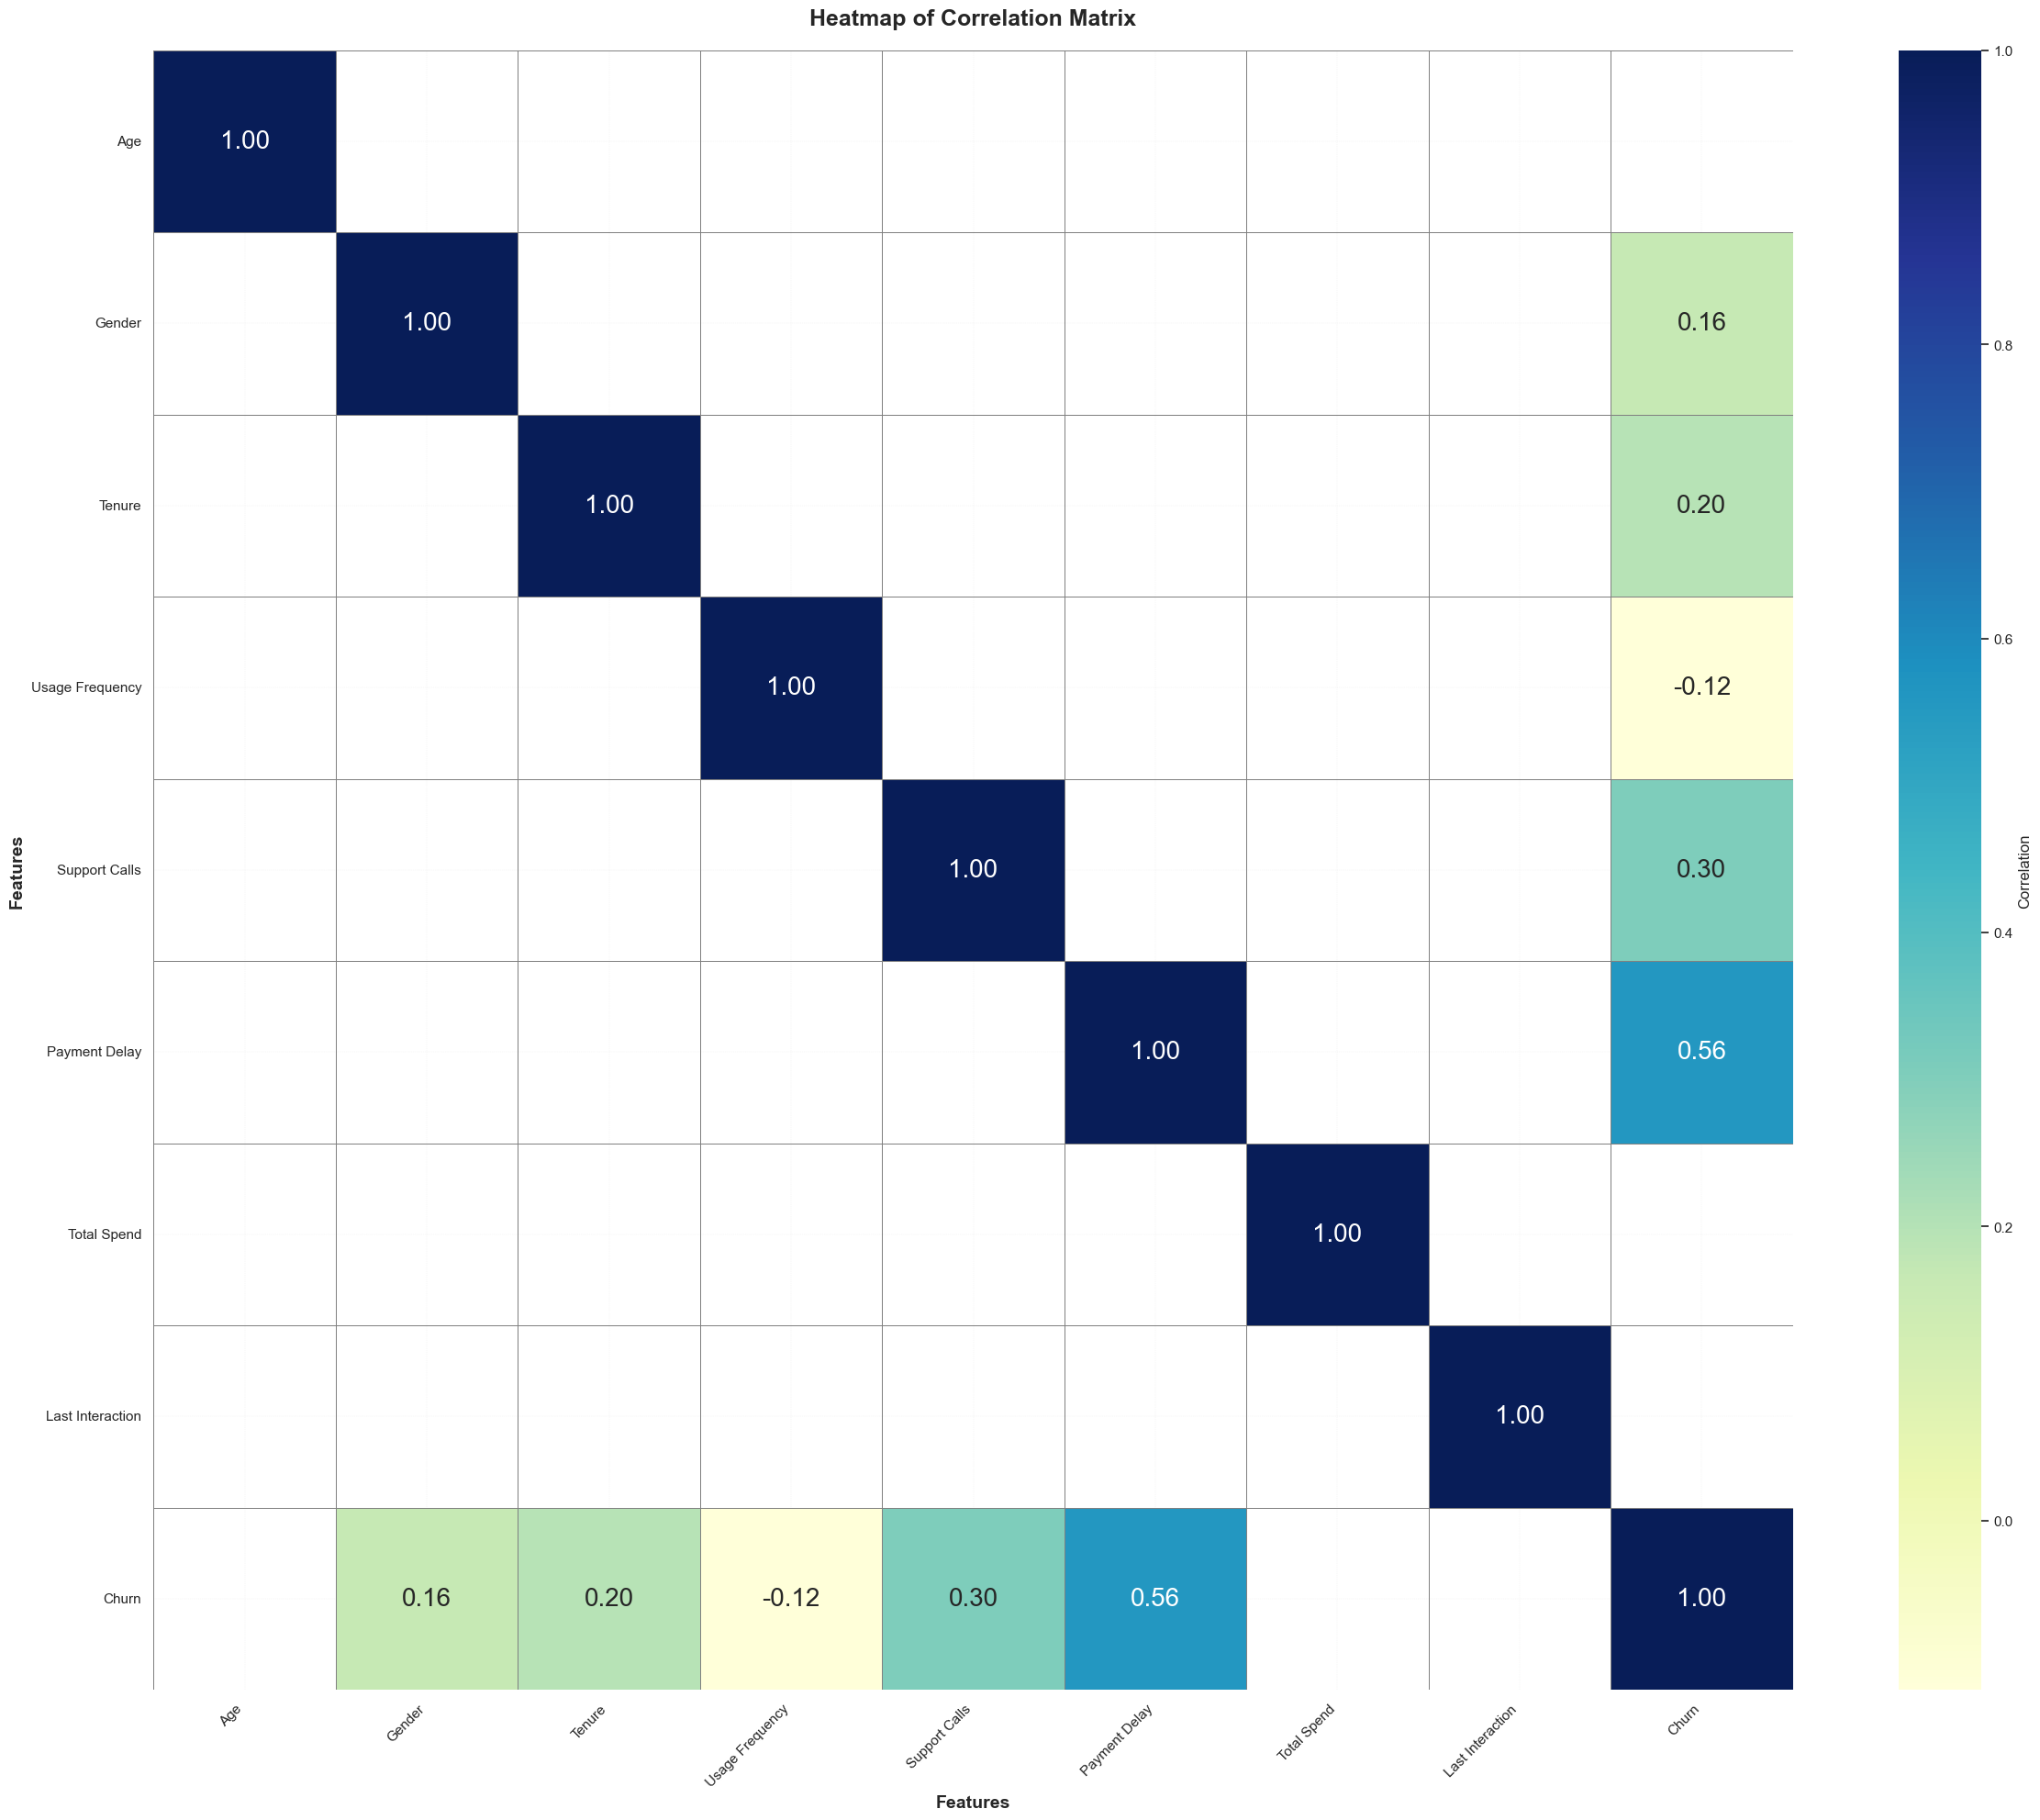

In [187]:
correlations = Heatmap_Correlation(df, mask=0.1, cmap="YlGnBu", adv_cmap=False, save_path=None, annot_size = 20, figsize=(25, 20))

# split data to x and y

In [188]:
x, y = get_x_y(df, target_column)

# Feature Selection

## Data Types and Corresponding Methods

### 1. Numerical Input and Numerical Output
#### Task: Regression
#### Methods: 
- SelectKBest, 
- SelectFdr, 
- SelectFwe, 
- SelectPercentile, 
- VarianceThreshold, 
- RFE, 
- RFECV, 
- SequentialFeatureSelector, 
- ExhaustiveFeatureSelector, 
- SelectFromModel, 
- TPOTRegressor, 
- Boruta, 
- InformationGain, 
- Lasso, 
- Ridge
#### Stat Methods: 
- f_regression, 
- mutual_info_regression, 
- pearsonr, 
- spearmanr, 
- kendalltau

### 2. Categorical Input and Numerical Output
#### Task: Regression
#### Methods:
- SelectKBest,
- SelectFdr,
- SelectFwe, 
- SelectPercentile,
- VarianceThreshold,
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTRegressor,
- Boruta,
- InformationGain
#### Stat Methods:
- f_regression,
- mutual_info_regression

### 3. Numerical Input and Categorical Output
#### Task: Classification
#### Methods: 
- SelectKBest,
- SelectFdr,
- SelectFwe,
- SelectPercentile,
- VarianceThreshold,
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTClassifier,
- Boruta,
- InformationGain
#### Stat Methods:
- chi2,
- f_classif,
- mutual_info_classif

### 4. Categorical Input and Categorical Output
#### Task: Classification
#### Methods:
- SelectKBest,
- SelectFdr,
- SelectFwe,
- SelectPercentile,
- VarianceThreshold,
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTClassifier,
- Boruta,
- InformationGain
#### Stat Methods:
- chi2,
- f_classif,
- mutual_info_classif

### 5. Mixed Numerical and Categorical Input with Numerical Output
#### Task: Regression
#### Methods:
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTRegressor,
- Boruta,

### 6. Mixed Numerical and Categorical Input with Categorical Output
#### Task: Classification
#### Methods:
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTRegressor,
- Boruta,
- InformationGain,


## feature_selection def

In [189]:
print(f'Number of columns before feature selection: {len(x.columns)}')
print(f'Number of column can decrease it by using feature selection: between {len(x.columns) * 1/2} and {len(x.columns) * 2/3}')

print(f'\ncolumns before feature selection: {x.columns}')

num_col = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'\nNumerical columns before feature selection: {num_col}')

cat_col = x.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(f'\nCategorical columns before feature selection: {cat_col}')

Number of columns before feature selection: 10
Number of column can decrease it by using feature selection: between 5.0 and 6.666666666666667

columns before feature selection: Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

Numerical columns before feature selection: ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

Categorical columns before feature selection: ['Subscription Type', 'Contract Length']


In [ ]:
# x, FS_model, column_mapping = feature_selection(x, y, method='SelectKBest',n_features_to_select=13,k = 13, task= 'classification', n_jobs=-1)

In [ ]:
# selected_mask_FS = FS_model.get_support()

# # Get selected and dropped columns
# selected_columns = x.columns[selected_mask_FS]
# dropped_columns = x.columns[~selected_mask_FS]

In [190]:
print(f'Number of columns after feature selection: {len(x.columns)}')

print(f'\ncolumns before feature selection: {x.columns}')

num_col = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'\nNumerical columns after feature selection: {num_col}')

cat_col = x.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(f'\nCategorical columns after feature selection: {cat_col}')

df = pd.concat([x, y], axis=1)

Number of columns after feature selection: 10

columns before feature selection: Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

Numerical columns after feature selection: ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

Categorical columns after feature selection: ['Subscription Type', 'Contract Length']


# Data Encoding

In [191]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['Subscription Type', 'Contract Length']

In [ ]:
# ordinal_categories = df[''].value_counts().index.to_list()
# ordinal_categories

In [192]:
column = ['Subscription Type', 'Contract Length']

df = encode_column(df, columns = 'Contract Length', method='get_dummies')

# df = encode_column(df, columns = '', method= 'label')

# df = encode_column(df, columns = '', method='target',target="")

# ordinal_categories = df['Subscription Type'].value_counts().index.to_list()
df = encode_column(df, columns = 'Subscription Type', method= 'ordinal', ordinal_categories=['Basic', 'Standard', 'Premium'])

df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

[]

In [193]:
len(df.columns)

12

## Make the target is last column

In [194]:
df = target_last_col(df,target_column)
df.head()

Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0   22       1      25               14              4       0.533333   
1   41       1      28               28              7      -0.400000   
2   47       0      27               10              2       0.666667   
3   35       0       9               12              5      -0.133333   
4   53       1      58               24              9      -1.133333   

   Subscription Type  Total Spend  Last Interaction  Contract Length_Monthly  \
0                0.0          598                 9                      1.0   
1                1.0          584                20                      1.0   
2                2.0          757                21                      0.0   
3                2.0          232                18                      0.0   
4                1.0          533                18                      0.0   

   Contract Length_Quarterly  Churn  
0                        0.0      1  
1                        0.0      0  
2                        0.0      0  
3                        1.0      0  
4                        0.0      0

# Repair unbalanced data by using oversampling and undersampling.

In [195]:
x, y = get_x_y(df, target=target_column)

In [198]:
Counter(df[target_column])

Counter({0: 33881, 1: 30493})

In [59]:
# the data is balanced
# df, x, y = over_under_sampling_classification(x, y, over_sampling_strategy=0.75, n_jobs=1)

### Check the unbalance data after repair 

In [60]:
# check_balance_classification(df,column_plot='Churn')

# Get X , Y (TVT)

In [199]:
x,y = get_x_y(df,target_column)

In [200]:
x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target=target_column)

In [201]:
get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

x_train shape = (45319, 11)
x_valid shape = (6180, 11)
x_test shape = (12875, 11)
y_train shape = (45319,)
y_valid shape = (6180,)
y_test shape = (12875,)


# Get train, valid and test data in same time

In [63]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Churn Value',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

In [202]:
x_train, x_valid, x_test = scale_data(x_train, x_valid, x_test)

# Dimensionality Reduction

In [67]:
# print(len(df.columns))
# print(x_train.shape[1])

In [68]:
# x_train, x_test, x_valid, DR_model = dimensionality_reduction(x_train=x_train, x_test=x_test, x_valid=x_valid, y_train=y_train, method= 'LDA', n_components=20)
# x = DR_model.transform(x)

# Train

In [203]:
models_names = ['XGBoost', 'RandomForest', 'SVM', 'Stacking']
models_values = [None, None, None, None]
have_overfitting = [None, None, None, None]

## XGBoost_model

In [204]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [205]:
best_params, best_score, best_estimator = grid_search_classifier('XGBoost', x_train, y_train, cv=type_cross_valid, scoring='accuracy')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200}
best_params = 0.9998896709987039


In [206]:
XGBoost_model = best_estimator
XGBoost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

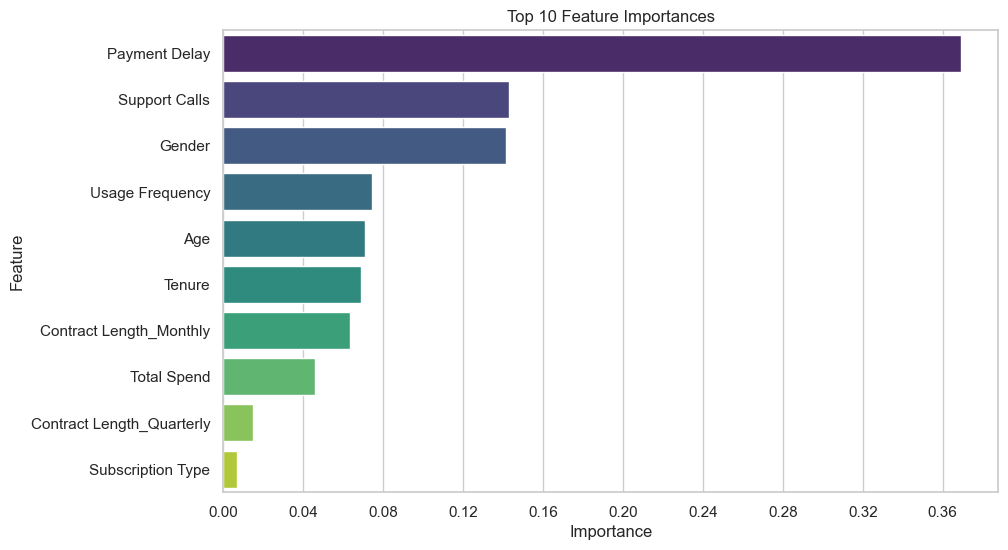

In [207]:
plot_feature_importance(XGBoost_model, x_train, x.columns, top_n='first')

### Check Overfitting

Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 0.9998

Precision:
Training Precision: 1.0000
Validation Precision: 0.9998

Recall:
Training Recall: 1.0000
Validation Recall: 0.9998

F1-Score:
Training F1-Score: 1.0000
Validation F1-Score: 0.9998

MCC:
Training MCC: 0.9999
Validation MCC: 0.9997

Balanced Accuracy:
Training Balanced Accuracy: 1.0000
Validation Balanced Accuracy: 0.9998

Confusion Matrix:
Validation Confusion Matrix:
[[3302    1]
 [   0 2877]]

Cross-Validation(CV):
Cross-Validation Scores: [0.99976699 1.         0.99976699 1.         0.99984465]
Cross-Validation Mean Score: 0.9999


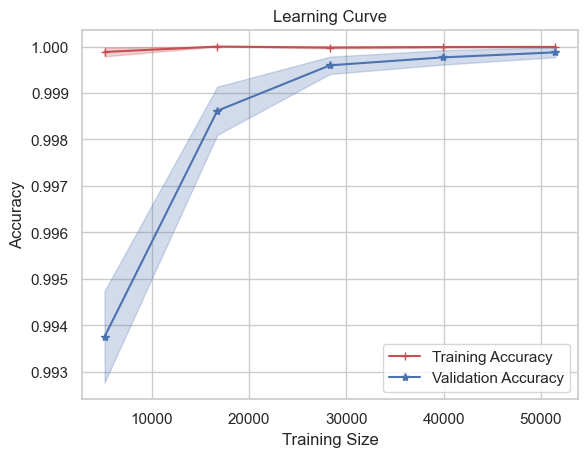

ROC AUC: 1.0000


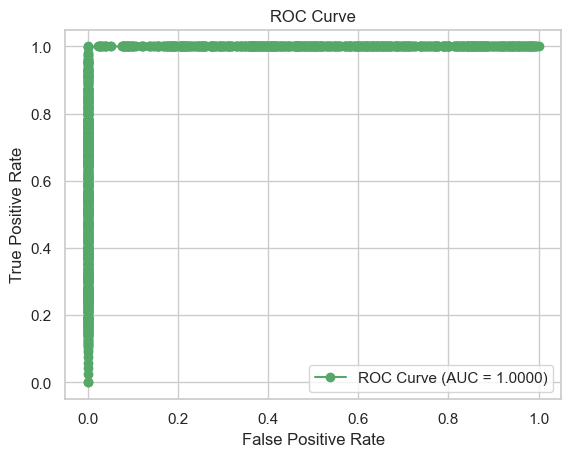

In [208]:
Check_Overfitting_Classification(XGBoost_model,x,y,x_train,y_train,x_valid,y_valid)

In [209]:
have_overfitting[0] = 1 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [210]:
y_pred = XGBoost_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

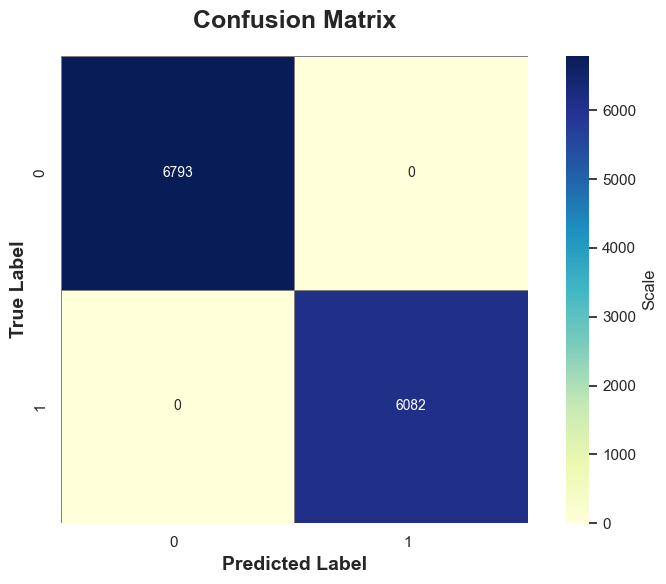

In [211]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 1.0000
Recall score = 1.0000
Precision score = 1.0000
F1 score = 1.0000
ROC AUC score = 1.0000

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875




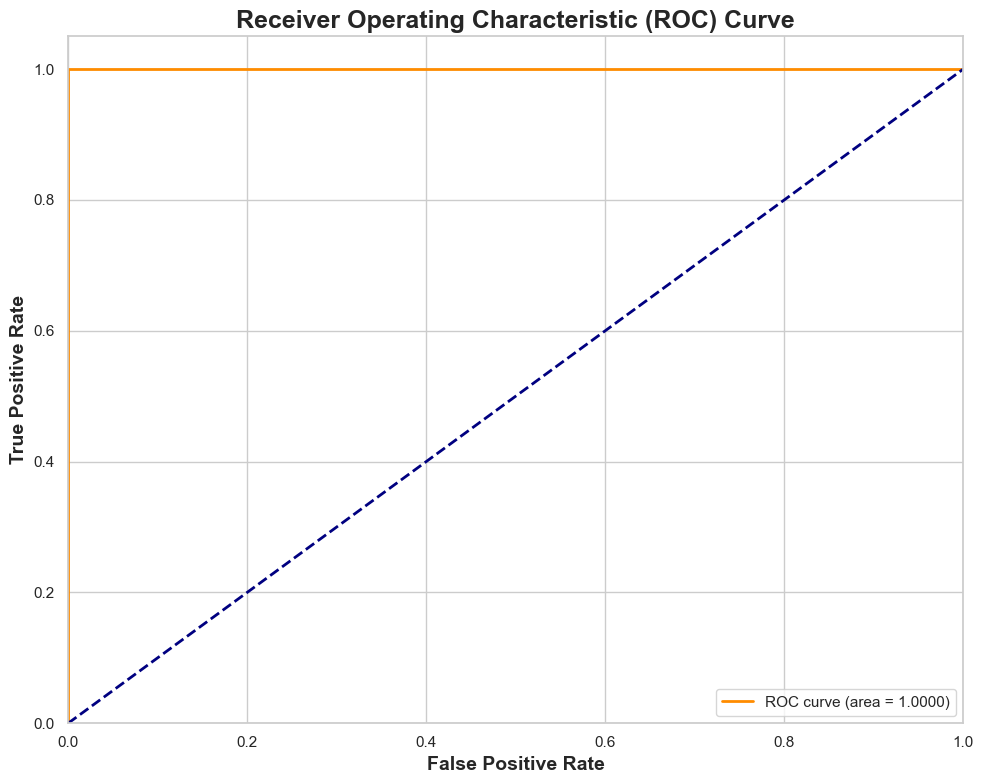

In [212]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[0] = [accuracy, recall, precision, f1, roc_auc]

## RandomForest_model

In [213]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [214]:
best_params, best_score, best_estimator = grid_search_classifier('RandomForest', x_train, y_train, cv=type_cross_valid, scoring='accuracy')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'max_depth': None, 'n_estimators': 300}
best_params = 0.9984995416511213


In [215]:
RandomForest_model = best_estimator
RandomForest_model

RandomForestClassifier(n_estimators=300, n_jobs=-1)

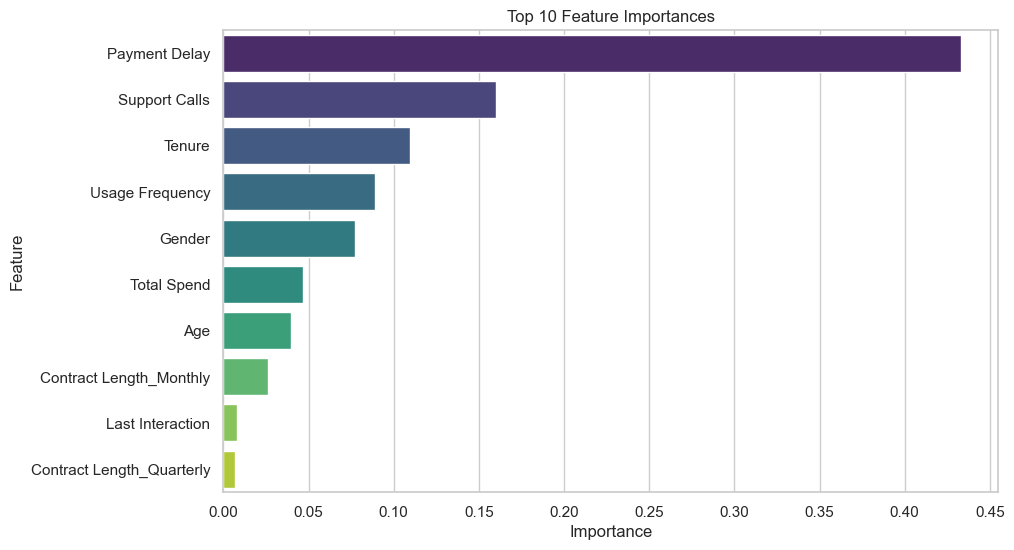

In [216]:
plot_feature_importance(RandomForest_model, x_train, x.columns, top_n='first')

### Check Overfitting

Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 0.9992

Precision:
Training Precision: 1.0000
Validation Precision: 0.9992

Recall:
Training Recall: 1.0000
Validation Recall: 0.9992

F1-Score:
Training F1-Score: 1.0000
Validation F1-Score: 0.9992

MCC:
Training MCC: 1.0000
Validation MCC: 0.9984

Balanced Accuracy:
Training Balanced Accuracy: 1.0000
Validation Balanced Accuracy: 0.9992

Confusion Matrix:
Validation Confusion Matrix:
[[3299    4]
 [   1 2876]]

Cross-Validation(CV):
Cross-Validation Scores: [0.99930097 0.99945631 0.9992233  0.99930097 0.99906789]
Cross-Validation Mean Score: 0.9993


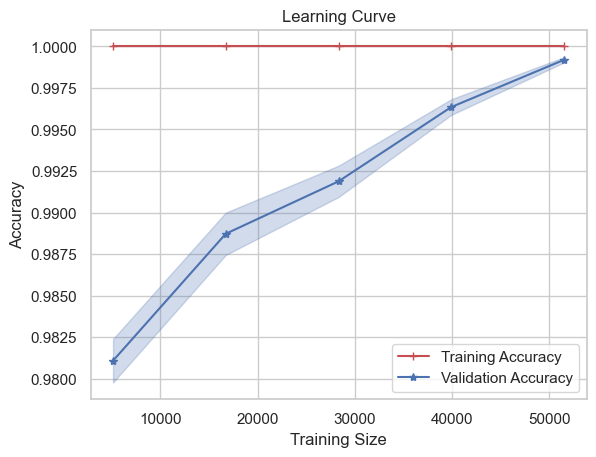

ROC AUC: 1.0000


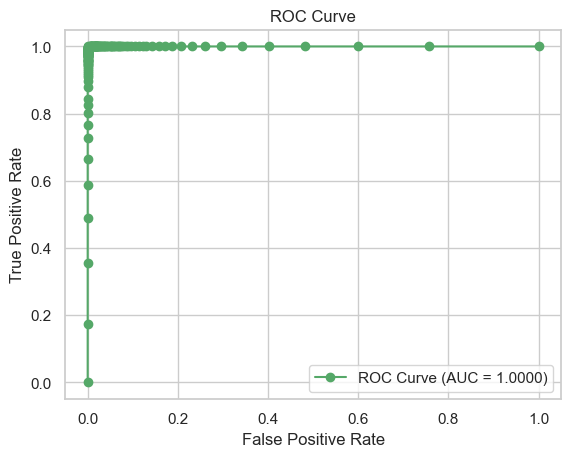

In [217]:
Check_Overfitting_Classification(RandomForest_model,x,y,x_train,y_train,x_valid,y_valid)

In [218]:
have_overfitting[1] = 1 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [219]:
y_pred = RandomForest_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

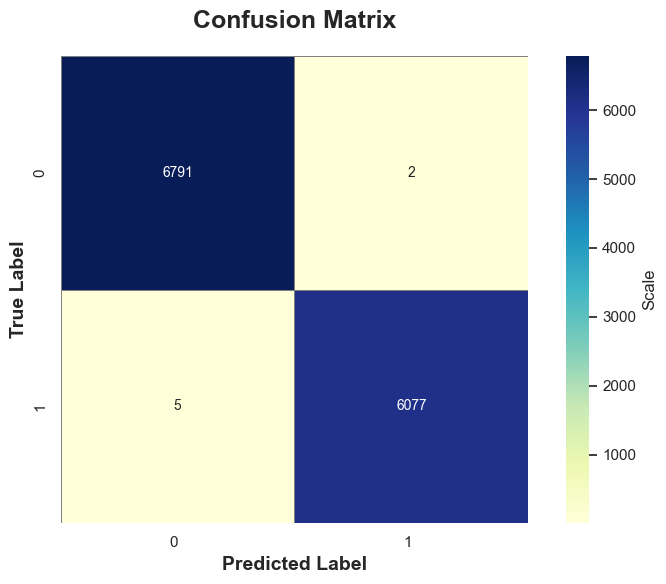

In [220]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.9995
Recall score = 0.9992
Precision score = 0.9997
F1 score = 0.9994
ROC AUC score = 0.9994

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875




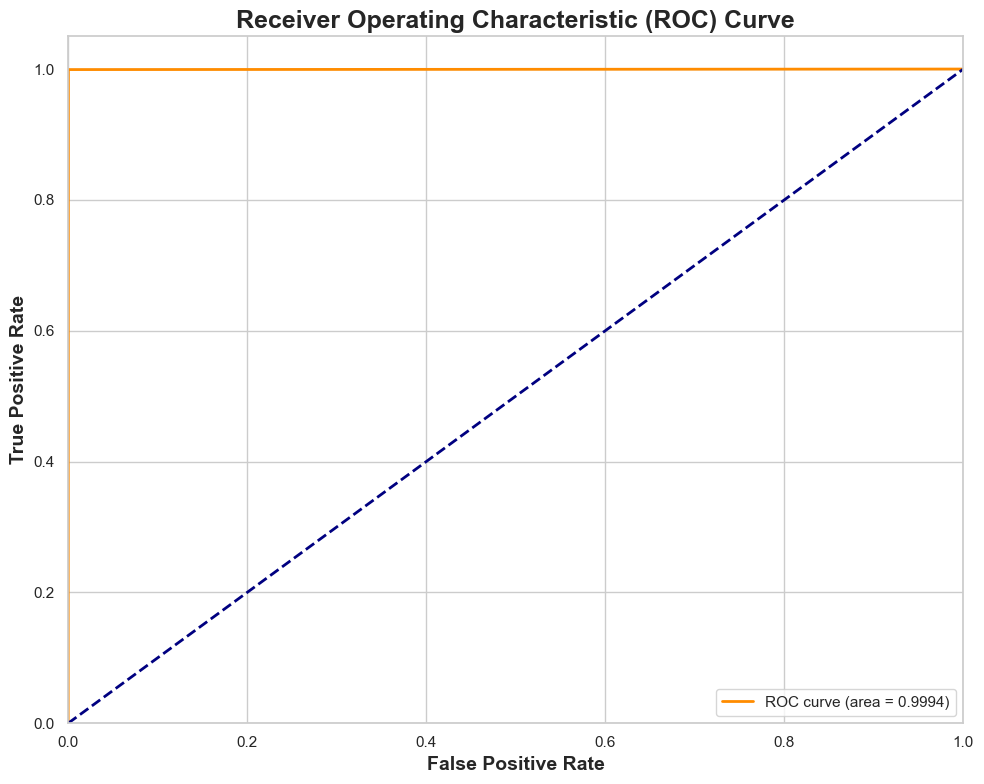

In [221]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[1] = [accuracy, recall, precision, f1, roc_auc]

## SVM_model

In [228]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [229]:
SVM_model = get_classifier('svc', x_train, y_train, plot = False, C = 100)
SVM_model

SVC(C=100)

### Check Overfitting

Accuracy:
Training Accuracy: 0.9857
Validation Accuracy: 0.9623

Precision:
Training Precision: 0.9857
Validation Precision: 0.9624

Recall:
Training Recall: 0.9857
Validation Recall: 0.9623

F1-Score:
Training F1-Score: 0.9857
Validation F1-Score: 0.9623

MCC:
Training MCC: 0.9714
Validation MCC: 0.9244

Balanced Accuracy:
Training Balanced Accuracy: 0.9858
Validation Balanced Accuracy: 0.9626

Confusion Matrix:
Validation Confusion Matrix:
[[3166  137]
 [  96 2781]]

Cross-Validation(CV):
Cross-Validation Scores: [0.84302913 0.83526214 0.83448544 0.83572816 0.84526954]
Cross-Validation Mean Score: 0.8388


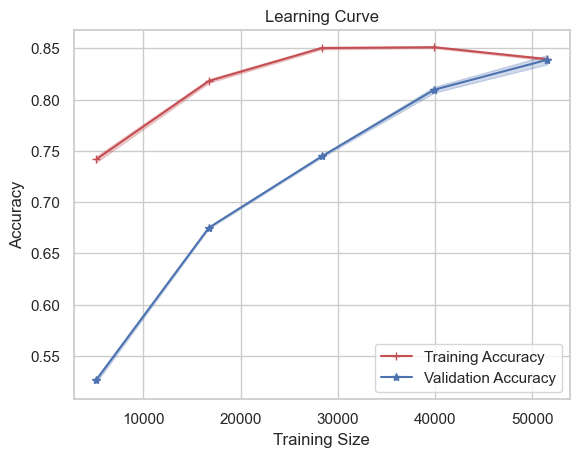

ROC AUC: Not available for this model


In [230]:
Check_Overfitting_Classification(SVM_model,x,y,x_train,y_train,x_valid,y_valid)

In [231]:
have_overfitting[2] = 0 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [232]:
y_pred = SVM_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

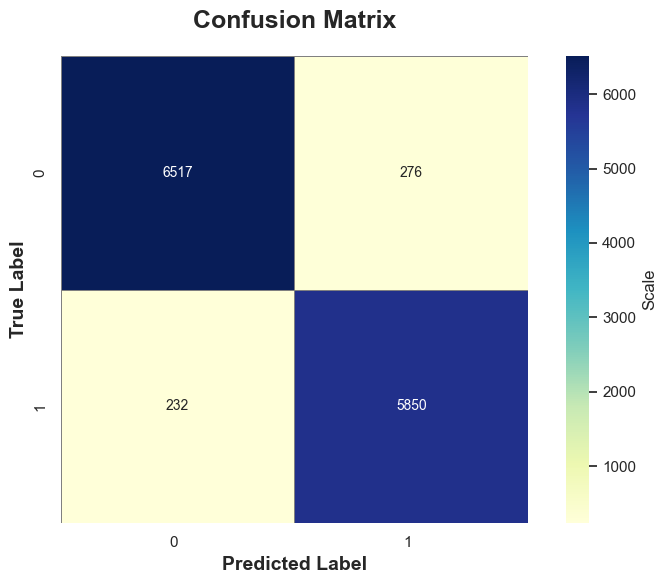

In [233]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.9605
Recall score = 0.9619
Precision score = 0.9549
F1 score = 0.9584
ROC AUC score = 0.9606

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6793
           1       0.95      0.96      0.96      6082

    accuracy                           0.96     12875
   macro avg       0.96      0.96      0.96     12875
weighted avg       0.96      0.96      0.96     12875




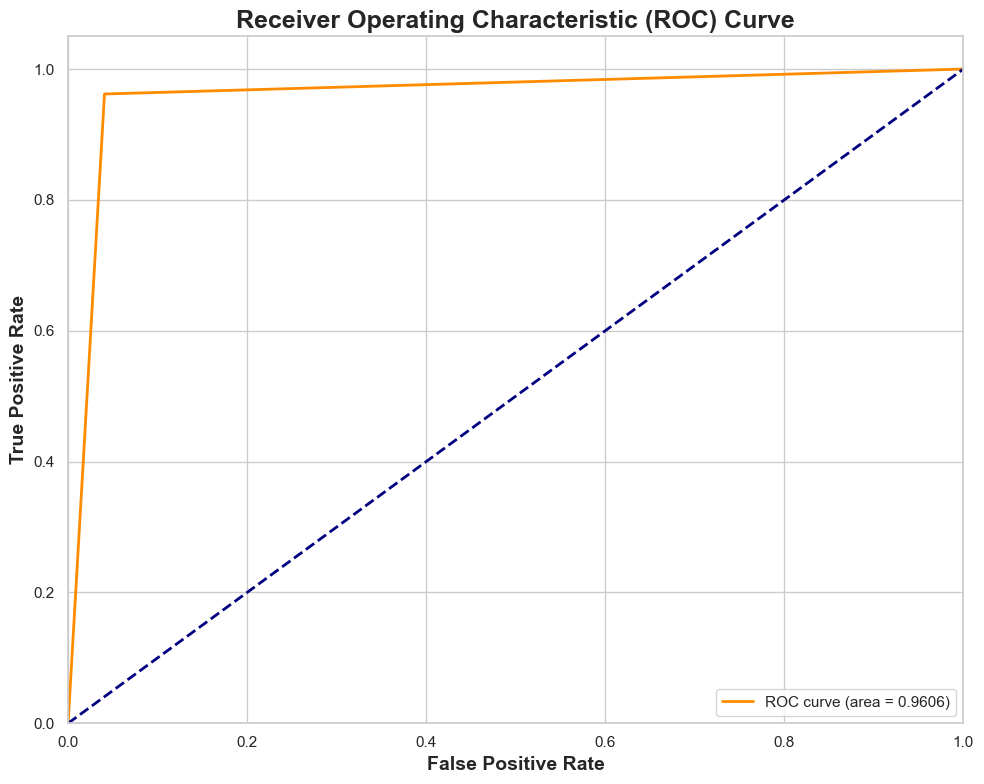

In [234]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[2] = [accuracy, recall, precision, f1, roc_auc]

## Stacking_model

In [235]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [236]:
xgboost = XGBClassifier(gamma= 0, learning_rate= 0.2, max_depth= 5, min_child_weight= 5, n_estimators= 100)
random_forest = RandomForestClassifier(max_depth=None, n_estimators=300, n_jobs=-1)
svc = SVC(C=100, kernel='rbf')

final_estimator= LogisticRegression()

voting_classifier =[('xgb', xgboost),('rf', random_forest),('svc', svc)]

Stacking_model = StackingClassifier(estimators=voting_classifier, cv=type_cross_valid, final_estimator=LogisticRegression())
Stacking_model.fit(x_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0,
                                              grow_policy=None,
                                              im...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=5, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf',
                                RandomForestClassifier(n_estimators=300,
                                                       n_jobs=-1)),
                               ('svc', SVC(C=100))],
                   final_estimator=LogisticRegression())

### Check Overfitting

Accuracy:
Training Accuracy: 1.0000
Validation Accuracy: 0.9998

Precision:
Training Precision: 1.0000
Validation Precision: 0.9998

Recall:
Training Recall: 1.0000
Validation Recall: 0.9998

F1-Score:
Training F1-Score: 1.0000
Validation F1-Score: 0.9998

MCC:
Training MCC: 1.0000
Validation MCC: 0.9997

Balanced Accuracy:
Training Balanced Accuracy: 1.0000
Validation Balanced Accuracy: 0.9998

Confusion Matrix:
Validation Confusion Matrix:
[[3302    1]
 [   0 2877]]

Cross-Validation(CV):
Cross-Validation Scores: [1.         1.         0.99976699 1.         0.99984465]
Cross-Validation Mean Score: 0.9999


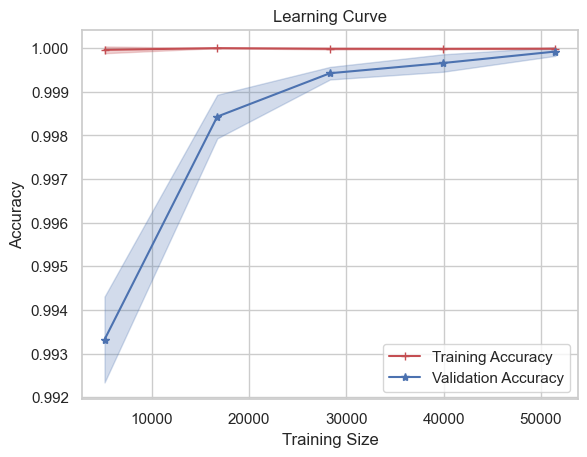

ROC AUC: 1.0000


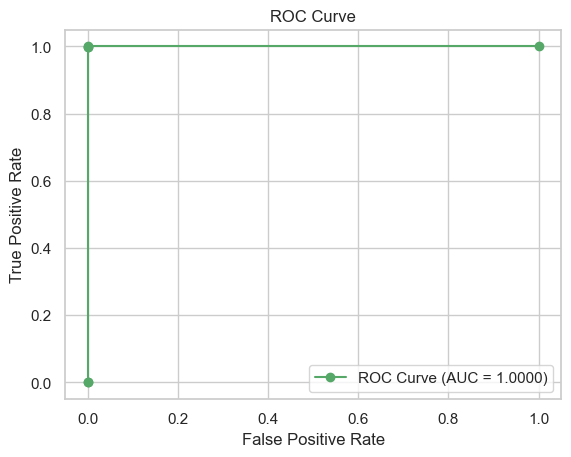

In [238]:
Check_Overfitting_Classification(Stacking_model,x,y,x_train,y_train,x_valid,y_valid)

In [239]:
have_overfitting[3] = 1 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [240]:
y_pred = Stacking_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

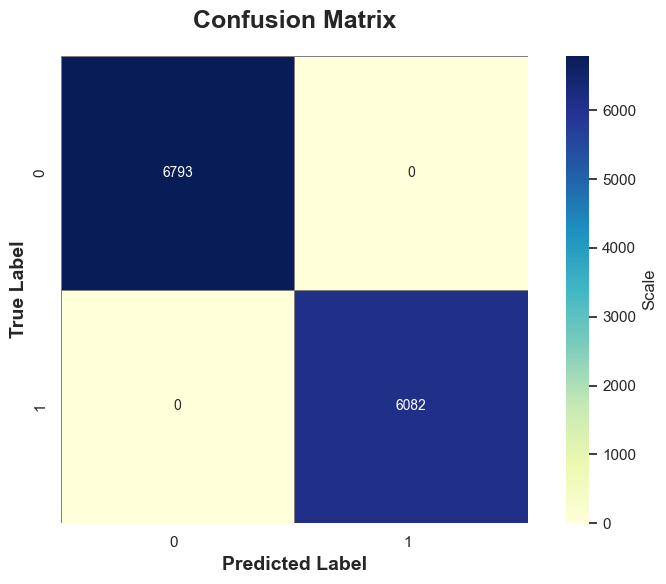

In [241]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 1.0000
Recall score = 1.0000
Precision score = 1.0000
F1 score = 1.0000
ROC AUC score = 1.0000

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875




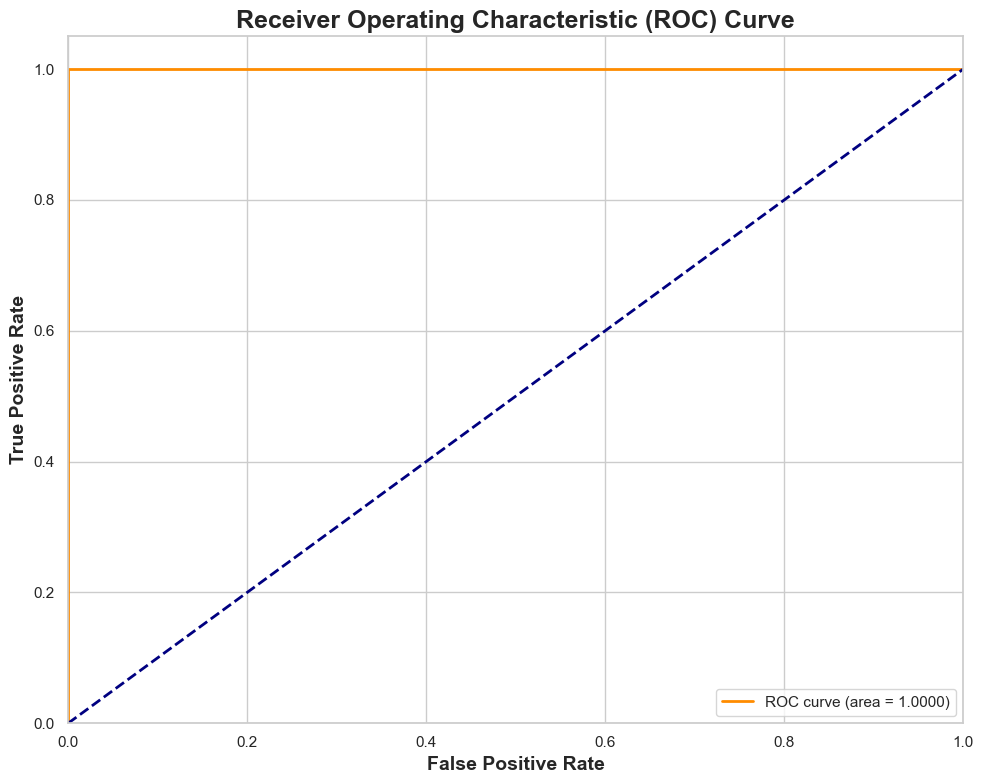

In [242]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values[3] = [accuracy, recall, precision, f1, roc_auc]

# compare between the models

In [243]:
evaluate_names = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']
models_names = ['XGBoost', 'RandomForest', 'DecisionTre', 'Stacking']

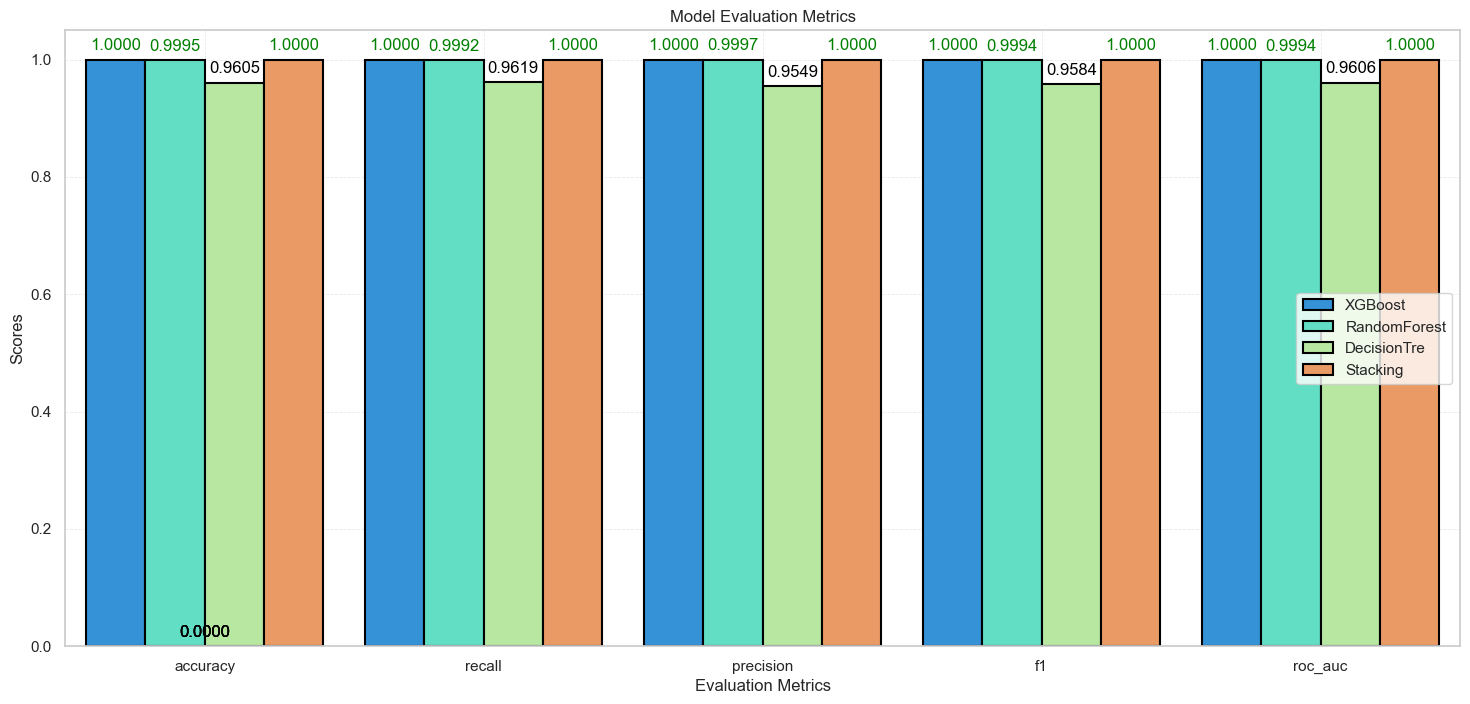

In [244]:
plots_evaluate_models(
    data=models_values, 
    labels=models_names, 
    categories=evaluate_names,
    have_overfitting=have_overfitting,
    palette='rainbow',
    title='Model Evaluation Metrics',
    xlabel='Evaluation Metrics',
    ylabel='Scores',
    figsize=(18, 8),
    width=0.85,
    hatch = False,
    annote_num = 4
)